In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from pandas import Series
from numpy import log
warnings.filterwarnings("ignore")
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [458]:
df = pd.read_csv('Conditional_Base_Monitoring in Marine_System.csv', names=['lp', 'v', 'gtt', 'gtn', 'ggn', 'ts', 'tp', 't48',
                                  't1', 't2', 'p48', 'p1', 'p2', 'pexh', 'tic', 'mf', 'y_1', 'y_2'])
df

lp                v  \
0      Lever position   Ship speed (v)    
1                 5.14               15   
2                  9.3               27   
3                8.206               24   
4                 5.14               15   
...                ...              ...   
12430              9.3               27   
12431            6.175               18   
12432             5.14               15   
12433            4.161               12   
12434            2.088                6   

                                                gtt  \
0      Gas Turbine (GT) shaft torque (GTT) [kN m]     
1                                         21640.162   
2                                         72776.229   
3                                         50994.673   
4                                         21626.805   
...                                             ...   
12430                                     72774.292   
12431                                     29796.511   
12432                                     21625.687   
12433                                     14718.853   
12434                                      3217.569   

                                        gtn  \
0      GT rate of revolutions (GTn) [rpm]     
1                                  1924.358   
2                                  3560.412   
3                                  3087.535   
4                                  1924.329   
...                                     ...   
12430                              3560.407   
12431                              2307.266   
12432                              1924.321   
12433                              1547.451   
12434                              1350.216   

                                                   ggn  \
0      Gas Generator rate of revolutions (GGn) [rpm]     
1                                             8516.691   
2                                             9759.837   
3                                             9313.854   
4                                             8472.097   
...                                                ...   
12430                                         9753.571   
12431                                         8840.516   
12432                                         8466.713   
12433                                         7728.002   
12434                                         6786.171   

                                           ts  \
0      Starboard Propeller Torque (Ts) [kN]     
1                                     175.324   
2                                     645.137   
3                                      438.11   
4                                     175.221   
...                                       ...   
12430                                 644.796   
12431                                 246.316   
12432                                 175.249   
12433                                 113.727   
12434                                  23.347   

                                      tp  \
0      Port Propeller Torque (Tp) [kN]     
1                                175.324   
2                                645.137   
3                                 438.11   
4                                175.221   
...                                  ...   
12430                            644.796   
12431                            246.316   
12432                            175.249   
12433                            113.727   
12434                             23.347   

                                                     t48  \
0      Hight Pressure (HP) Turbine exit temperature (...   
1                                                706.702   
2                                               1060.156   
3                                                927.728   
4                                                695.477   
...                                                  ...   
12430                                     

In [459]:
df.drop([0], inplace = True)

In [460]:
df = df.reset_index()

In [461]:
df.head(15)

index     lp   v        gtt       gtn       ggn       ts       tp  \
0       1   5.14  15  21640.162  1924.358  8516.691  175.324  175.324   
1       2    9.3  27  72776.229  3560.412  9759.837  645.137  645.137   
2       3  8.206  24  50994.673  3087.535  9313.854   438.11   438.11   
3       4   5.14  15  21626.805  1924.329  8472.097  175.221  175.221   
4       5   5.14  15   21636.43  1924.313  8494.777      NaN      NaN   
5       6  4.161  12  14723.428  1547.467  7790.899  113.778  113.778   
6       7  3.144   9    8378.77  1386.755  7109.648   60.355   60.355   
7       8  1.138   3    610.055  1337.789  6638.356    6.724    6.724   
8       9   5.14  15  21637.345  1924.331  8501.889  175.319  175.319   
9      10  2.088   6   2995.789  1354.441   6810.69   24.107   24.107   
10     11  8.206  24  50993.827  3087.505  9315.163  437.958  437.958   
11     12    9.3  27   72771.59  3560.425  9784.697  645.124  645.124   
12     13    9.3  27  72758.486  3560.371  9730.414   644.76   644.76   
13     14  1.138   3   3868.157  1408.919    6678.9   10.849   10.849   
14     15  4.161  12  14718.337   1547.45   7722.95  113.728  113.728   

         t48   t1       t2    p48     p1      p2   pexh     tic     mf    y_1  \
0    706.702  288  640.873  2.072  0.998  10.916  1.026   24.96  0.494  0.951   
1   1060.156  288  774.302  4.511  0.998  22.426  1.051  87.741  1.737  0.982   
2    927.728  288  734.474  3.577  0.998  18.412  1.041  60.546  1.199  0.966   
3    695.477  288  633.124  2.086  0.998  11.074  1.027  24.549  0.486  0.989   
4    731.494  288  645.642  2.078  0.998  11.197  1.026  26.373  0.522   0.95   
5    644.315  288  609.087  1.657  0.998   8.901  1.022  17.334  0.343  0.962   
6    593.495  288   583.81  1.389  0.998   7.513   1.02  12.593  0.249  0.961   
7    450.949  288  540.999  1.108  0.998   5.896  1.019  13.461  0.085  0.992   
8    719.012  288  642.866  2.076  0.998  11.075  1.026  25.681  0.508  0.953   
9    514.229  288  560.746  1.202  0.998   6.479  1.019  15.439   0.15  0.964   
10   914.079  288  731.318  3.573  0.998  18.226  1.042   59.39  1.176  0.971   
11  1103.606  288    786.8  4.487  0.998  22.524  1.049  91.233  1.806  0.952   
12  1060.879  288  772.415  4.548  0.998  22.969  1.051   88.53  1.752  0.995   
13   533.251  288  556.875  1.239  0.998   6.601  1.019       0  0.172  0.997   
14   626.959  288  601.552  1.663  0.998   8.905  1.023  16.612  0.329  0.995   

      y_2  
0       1  
1   0.997  
2   0.988  
3   0.991  
4   0.975  
5   0.988  
6   0.984  
7   0.999  
8   0.986  
9   0.986  
10  0.998  
11  0.986  
12   0.98  
13  0.999  
14  0.991

In [462]:
df = df.drop(columns='index', axis = 1)

In [463]:
df

lp   v        gtt       gtn       ggn       ts       tp       t48  \
0       5.14  15  21640.162  1924.358  8516.691  175.324  175.324   706.702   
1        9.3  27  72776.229  3560.412  9759.837  645.137  645.137  1060.156   
2      8.206  24  50994.673  3087.535  9313.854   438.11   438.11   927.728   
3       5.14  15  21626.805  1924.329  8472.097  175.221  175.221   695.477   
4       5.14  15   21636.43  1924.313  8494.777      NaN      NaN   731.494   
...      ...  ..        ...       ...       ...      ...      ...       ...   
12429    9.3  27  72774.292  3560.407  9753.571  644.796  644.796   1055.58   
12430  6.175  18  29796.511  2307.266  8840.516  246.316  246.316   780.537   
12431   5.14  15  21625.687  1924.321  8466.713  175.249  175.249   699.706   
12432  4.161  12  14718.853  1547.451  7728.002  113.727  113.727   631.711   
12433  2.088   6   3217.569  1350.216  6786.171   23.347   23.347    525.82   

        t1       t2    p48     p1      p2   pexh     tic     mf    y_1    y_2  
0      288  640.873  2.072  0.998  10.916  1.026   24.96  0.494  0.951      1  
1      288  774.302  4.511  0.998  22.426  1.051  87.741  1.737  0.982  0.997  
2      288  734.474  3.577  0.998  18.412  1.041  60.546  1.199  0.966  0.988  
3      288  633.124  2.086  0.998  11.074  1.027  24.549  0.486  0.989  0.991  
4      288  645.642  2.078  0.998  11.197  1.026  26.373  0.522   0.95  0.975  
...    ...      ...    ...    ...     ...    ...     ...    ...    ...    ...  
12429  288  772.682  4.519  0.998  22.485  1.051   87.46  1.731  0.987  0.996  
12430  288  671.845  2.497  0.998  13.144   1.03  34.498  0.683  0.954  0.991  
12431  288  633.775  2.088  0.998  11.132  1.027  24.802  0.491   0.99  0.986  
12432  288  603.073  1.663  0.998   8.927  1.023  16.827  0.333   0.99  0.988  
12433  288  561.995  1.209  0.998   6.558  1.019  18.305  0.165  0.967   0.98  

[12434 rows x 18 columns]

In [464]:
df.shape

(12434, 18)

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12434 entries, 0 to 12433
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lp      12387 non-null  object
 1   v       12374 non-null  object
 2   gtt     12390 non-null  object
 3   gtn     12383 non-null  object
 4   ggn     12389 non-null  object
 5   ts      12385 non-null  object
 6   tp      12377 non-null  object
 7   t48     12371 non-null  object
 8   t1      12376 non-null  object
 9   t2      12388 non-null  object
 10  p48     12386 non-null  object
 11  p1      12375 non-null  object
 12  p2      12391 non-null  object
 13  pexh    12379 non-null  object
 14  tic     12373 non-null  object
 15  mf      12399 non-null  object
 16  y_1     12393 non-null  object
 17  y_2     12382 non-null  object
dtypes: object(18)
memory usage: 1.7+ MB


In [466]:
df.sample(5)

lp   v        gtt       gtn       ggn       ts       tp      t48  \
9960    5.14  15  21623.452  1924.326   8462.04  175.199  175.199  691.413   
9668   4.161  12   14722.14  1547.462  7772.589   113.77   113.77  640.657   
487    4.161  12  14724.066  1547.468   7797.85  113.794  113.794    645.7   
5367   1.138   3   5031.919  1411.429  6741.138   11.245   11.245  596.215   
12066  3.144   9   8377.932   1386.75  7093.994   60.344   60.344  589.058   

        t1       t2    p48     p1     p2   pexh     tic     mf    y_1    y_2  
9960   288  630.933   2.09  0.998   11.1  1.027  24.372  0.482  0.999   0.99  
9668   288  607.343  1.659  0.998  8.908  1.022  17.188   0.34   0.97  0.988  
487    288  609.747  1.657  0.998  8.898  1.022  17.389  0.344  0.959  0.988  
5367   288  572.763  1.276  0.998  6.898  1.019       0  0.233  0.953  0.985  
12066  288  581.924   1.39  0.998  7.509   1.02  12.424  0.246  0.969  0.985

In [467]:
df.isnull().sum()

lp      47
v       60
gtt     44
gtn     51
ggn     45
ts      49
tp      57
t48     63
t1      58
t2      46
p48     48
p1      59
p2      43
pexh    55
tic     61
mf      35
y_1     41
y_2     52
dtype: int64

In [468]:
# there are many nan values , but we we handle this nan value after fixing the data

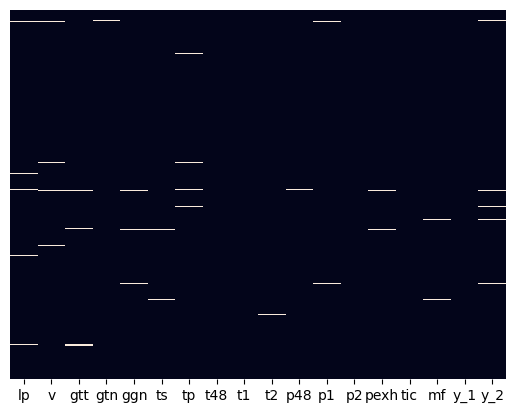

In [469]:
sns.heatmap(df.isnull(),yticklabels= False, cbar= False)
plt.savefig('null_values.png')
plt.show()

In [470]:
df.isnull().sum()

lp      47
v       60
gtt     44
gtn     51
ggn     45
ts      49
tp      57
t48     63
t1      58
t2      46
p48     48
p1      59
p2      43
pexh    55
tic     61
mf      35
y_1     41
y_2     52
dtype: int64

In [471]:
df.duplicated().sum()

43

In [472]:
df.duplicated().sum()

43

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12434 entries, 0 to 12433
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lp      12387 non-null  object
 1   v       12374 non-null  object
 2   gtt     12390 non-null  object
 3   gtn     12383 non-null  object
 4   ggn     12389 non-null  object
 5   ts      12385 non-null  object
 6   tp      12377 non-null  object
 7   t48     12371 non-null  object
 8   t1      12376 non-null  object
 9   t2      12388 non-null  object
 10  p48     12386 non-null  object
 11  p1      12375 non-null  object
 12  p2      12391 non-null  object
 13  pexh    12379 non-null  object
 14  tic     12373 non-null  object
 15  mf      12399 non-null  object
 16  y_1     12393 non-null  object
 17  y_2     12382 non-null  object
dtypes: object(18)
memory usage: 1.7+ MB


In [474]:
df.columns

Index(['lp', 'v', 'gtt', 'gtn', 'ggn', 'ts', 'tp', 't48', 't1', 't2', 'p48',
       'p1', 'p2', 'pexh', 'tic', 'mf', 'y_1', 'y_2'],
      dtype='object')

In [475]:
df['lp'].unique()

array(['5.14', '9.3', '8.206', '4.161', '3.144', '1.138', '2.088',
       '6.175', '7.148', nan, '2.088x', '1.138x', '4.161x', '3.144x',
       '5.14x', '3,144', 'nanx', '2,088', '5,14'], dtype=object)

In [476]:
df['lp'].unique()

array(['5.14', '9.3', '8.206', '4.161', '3.144', '1.138', '2.088',
       '6.175', '7.148', nan, '2.088x', '1.138x', '4.161x', '3.144x',
       '5.14x', '3,144', 'nanx', '2,088', '5,14'], dtype=object)

In [477]:
df.columns

Index(['lp', 'v', 'gtt', 'gtn', 'ggn', 'ts', 'tp', 't48', 't1', 't2', 'p48',
       'p1', 'p2', 'pexh', 'tic', 'mf', 'y_1', 'y_2'],
      dtype='object')

In [478]:
def strip_x(x):
    if isinstance(x, str):
        cleaned_x = x.replace(',', '.').strip('x')
        if cleaned_x == 'nan':
            return np.nan
        return float(cleaned_x)
    return float(x)

In [479]:
df['lp'] = df['lp'].apply(strip_x)

In [480]:
df['lp'].unique()

array([5.14 , 9.3  , 8.206, 4.161, 3.144, 1.138, 2.088, 6.175, 7.148,
         nan])

In [481]:
df['v'].unique()

array(['15', '27', '24', '12', '9', '3', '6', '18', '21', '9,0', nan,
       '6.0x', '3,0', '15,0', 'nanx', '6,0', '3.0x', '15.0x', '9.0x',
       '12.0x', '12,0'], dtype=object)

In [482]:
df['v'] = df['v'].apply(strip_x)

In [483]:
df['v'].unique()

array([15., 27., 24., 12.,  9.,  3.,  6., 18., 21., nan])

In [484]:
df['gtt'].unique()

array(['21640.162', '72776.229', '50994.673', ..., '21625.687',
       '14718.853', '3217.569'], dtype=object)

In [485]:
import re
def process_commas(value):
    # Convert the input to a string if it's not already a string
    value_str = str(value)
    
    # Handle 'nanx' and similar cases by converting to np.nan
    if re.match(r'^\s*n[ax]*$', value_str, re.IGNORECASE):
        return np.nan
    
    # Remove any trailing 'x'
    value_str = value_str.strip('x')
    
    # Check the number of commas
    comma_count = value_str.count(',')
    
    if comma_count == 1:
        # Replace the only comma with a period
        result = value_str.replace(',', '.')
    elif comma_count > 1:
        # Remove the first comma and replace the last comma with a period
        value_str = re.sub(r',', '', value_str, count=1)  # Remove the first comma
        result = re.sub(r',([^,]*)$', r'.\1', value_str)  # Replace the last comma with a period
    else:
        # No commas, return the cleaned string
        result = value_str
    
    return result

In [486]:
df['gtt'].unique()

array(['21640.162', '72776.229', '50994.673', ..., '21625.687',
       '14718.853', '3217.569'], dtype=object)

In [487]:
df['gtt'] = df['gtt'].apply(process_commas)

In [488]:
df['gtt'].unique()

array(['21640.162', '72776.229', '50994.673', ..., '21625.687',
       '14718.853', '3217.569'], dtype=object)

In [489]:
df['gtt'] = df['gtt'].astype('float')

In [490]:
df['gtt'] 

0        21640.162
1        72776.229
2        50994.673
3        21626.805
4        21636.430
           ...    
12429    72774.292
12430    29796.511
12431    21625.687
12432    14718.853
12433     3217.569
Name: gtt, Length: 12434, dtype: float64

In [491]:
df['gtt'].describe()

count    12386.000000
mean     26629.808575
std      22016.015791
min        253.547000
25%       8375.517500
50%      21628.965000
75%      38998.160500
max      72784.872000
Name: gtt, dtype: float64

In [492]:
df.loc[10266]

lp         1.138
v            3.0
gtt      7164.74
gtn     1371.946
ggn     6700.741
ts         8.805
tp         8.805
t48      642.381
t1           288
t2       573.886
p48         1.33
p1         0.998
p2         7.154
pexh       1.019
tic        5.969
mf         0.304
y_1        0.973
y_2        0.996
Name: 10266, dtype: object

In [493]:
df['gtn'] = df['gtn'].apply(process_commas).astype('float')

In [494]:
df['gtn']

0        1924.358
1        3560.412
2        3087.535
3        1924.329
4        1924.313
           ...   
12429    3560.407
12430    2307.266
12431    1924.321
12432    1547.451
12433    1350.216
Name: gtn, Length: 12434, dtype: float64

In [495]:
df['gtn'].describe()

count    12380.000000
mean      2114.004859
std        769.776702
min       1307.675000
25%       1386.756000
50%       1924.319000
75%       2678.077000
max       3560.741000
Name: gtn, dtype: float64

In [496]:
df['ggn'] = df['ggn'].apply(process_commas).astype('float')

In [497]:
df['ggn'].describe()

count    12389.000000
mean      8170.637122
std       1090.006884
min       6589.002000
25%       7051.201000
50%       8477.011000
75%       9130.490000
max       9797.103000
Name: ggn, dtype: float64

In [498]:
df['ts'] = df['ts'].apply(process_commas).astype('float')

In [499]:
df['ts'].describe()

count    12385.000000
mean       221.744977
std        199.224496
min          5.304000
25%         60.313000
50%        175.255000
75%        332.329000
max        645.249000
Name: ts, dtype: float64

In [500]:
df['tp'] = df['tp'].apply(process_commas).astype('float')

In [501]:
df['tp'].describe()

count    12376.000000
mean       221.994547
std        199.154902
min          5.304000
25%         60.314000
50%        175.256000
75%        332.330000
max        645.249000
Name: tp, dtype: float64

In [502]:
df['t48'] = df['t48'].apply(process_commas).astype('float')

In [503]:
df['t48'].describe()

count    12368.000000
mean       731.273808
std        172.865123
min        442.364000
25%        590.040500
50%        703.211500
75%        830.770500
max       1115.797000
Name: t48, dtype: float64

In [504]:
df['t1'] = df['t1'].apply(process_commas).astype('float')

In [505]:
df['t2'] = df['t2'].apply(process_commas).astype('float')

In [506]:
df['t2'].describe()

count    12386.000000
mean       644.354205
std         72.231525
min        540.442000
25%        578.199500
50%        635.803500
75%        692.565250
max        789.094000
Name: t2, dtype: float64

In [507]:
df['p48'] = df['p48'].apply(process_commas).astype('float')

In [508]:
df['p48'].describe()

count    12384.000000
mean         2.322415
std          1.078328
min          1.093000
25%          1.388000
50%          2.080000
75%          2.979000
max          4.560000
Name: p48, dtype: float64

In [509]:
df['p1'] = df['p1'].apply(process_commas).astype('float')

In [510]:
df['p1'].unique()

array([0.998,   nan])

In [511]:
df['p2'] = df['p2'].apply(process_commas).astype('float')

In [512]:
df['p2'].describe()

count    12391.000000
mean        12.145135
std          5.306440
min          5.828000
25%          7.437000
50%         11.061000
75%         15.619500
max         23.140000
Name: p2, dtype: float64

In [513]:
df.columns

Index(['lp', 'v', 'gtt', 'gtn', 'ggn', 'ts', 'tp', 't48', 't1', 't2', 'p48',
       'p1', 'p2', 'pexh', 'tic', 'mf', 'y_1', 'y_2'],
      dtype='object')

In [514]:
df['pexh'].unique()

array(['1.026', '1.051', '1.041', '1.027', '1.022', '1.02', '1.019',
       '1.042', '1.049', '1.023', '1.03', '1.05', '1.036', '1.035',
       '1.031', nan, '1.021', '1.052', '1.02x', '1.043', '1.026x',
       '1.019x', '1,022', '1,019', '1,02', '1.04', 'nanx', '1.022x'],
      dtype=object)

In [515]:
df['pexh'] = df['pexh'].apply(process_commas).astype('float')

In [516]:
df['tic'].head(16)

0      24.96
1     87.741
2     60.546
3     24.549
4     26.373
5     17.334
6     12.593
7     13.461
8     25.681
9     15.439
10     59.39
11    91.233
12     88.53
13         0
14    16.612
15    59.927
Name: tic, dtype: object

In [517]:
df['tic'] = df['tic'].apply(process_commas).astype('float')

In [518]:
df['tic'].describe()

count    12370.000000
mean        32.983910
std         25.643388
min          0.000000
25%         12.954250
50%         25.130000
75%         44.342250
max         92.556000
Name: tic, dtype: float64

In [519]:
df.head(1)

lp     v        gtt       gtn       ggn       ts       tp      t48  \
0  5.14  15.0  21640.162  1924.358  8516.691  175.324  175.324  706.702   

      t1       t2    p48     p1      p2   pexh    tic     mf    y_1 y_2  
0  288.0  640.873  2.072  0.998  10.916  1.026  24.96  0.494  0.951   1

In [520]:
df['mf'] = df['mf'].apply(process_commas).astype('float')

In [521]:
df['mf'].describe()

count    12399.000000
mean         0.648773
std          0.503076
min          0.068000
25%          0.246000
50%          0.493000
75%          0.878000
max          1.832000
Name: mf, dtype: float64

In [522]:
df['y_1'] = df['y_1'].apply(process_commas).astype('float')

In [523]:
df['y_1'].describe()

count    12393.000000
mean         0.974074
std          0.015197
min          0.950000
25%          0.961000
50%          0.974000
75%          0.987000
max          1.000000
Name: y_1, dtype: float64

In [524]:
df['y_2'] = df['y_2'].apply(process_commas).astype('float')

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12434 entries, 0 to 12433
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lp      12386 non-null  float64
 1   v       12372 non-null  float64
 2   gtt     12386 non-null  float64
 3   gtn     12380 non-null  float64
 4   ggn     12389 non-null  float64
 5   ts      12385 non-null  float64
 6   tp      12376 non-null  float64
 7   t48     12368 non-null  float64
 8   t1      12376 non-null  float64
 9   t2      12386 non-null  float64
 10  p48     12384 non-null  float64
 11  p1      12374 non-null  float64
 12  p2      12391 non-null  float64
 13  pexh    12377 non-null  float64
 14  tic     12370 non-null  float64
 15  mf      12399 non-null  float64
 16  y_1     12393 non-null  float64
 17  y_2     12381 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [526]:
df.isnull().sum()

lp      48
v       62
gtt     48
gtn     54
ggn     45
ts      49
tp      58
t48     66
t1      58
t2      48
p48     50
p1      60
p2      43
pexh    57
tic     64
mf      35
y_1     41
y_2     53
dtype: int64

In [69]:
df.head()

lp     v        gtt       gtn       ggn       ts       tp       t48  \
0  5.140  15.0  21640.162  1924.358  8516.691  175.324  175.324   706.702   
1  9.300  27.0  72776.229  3560.412  9759.837  645.137  645.137  1060.156   
2  8.206  24.0  50994.673  3087.535  9313.854  438.110  438.110   927.728   
3  5.140  15.0  21626.805  1924.329  8472.097  175.221  175.221   695.477   
4  5.140  15.0  21636.430  1924.313  8494.777      NaN      NaN   731.494   

      t1       t2    p48     p1      p2   pexh     tic     mf    y_1    y_2  
0  288.0  640.873  2.072  0.998  10.916  1.026  24.960  0.494  0.951  1.000  
1  288.0  774.302  4.511  0.998  22.426  1.051  87.741  1.737  0.982  0.997  
2  288.0  734.474  3.577  0.998  18.412  1.041  60.546  1.199  0.966  0.988  
3  288.0  633.124  2.086  0.998  11.074  1.027  24.549  0.486  0.989  0.991  
4  288.0  645.642  2.078  0.998  11.197  1.026  26.373  0.522  0.950  0.975

In [70]:
df.describe()

lp             v           gtt           gtn           ggn  \
count  12386.000000  12372.000000  12386.000000  12380.000000  12389.000000   
mean       5.091730     14.784433  26629.808575   2114.004859   8170.637122   
std        2.620855      7.732232  22016.015791    769.776702   1090.006884   
min        1.138000      3.000000    253.547000   1307.675000   6589.002000   
25%        3.144000      9.000000   8375.517500   1386.756000   7051.201000   
50%        5.140000     15.000000  21628.965000   1924.319000   8477.011000   
75%        7.148000     21.000000  38998.160500   2678.077000   9130.490000   
max        9.300000     27.000000  72784.872000   3560.741000   9797.103000   

                 ts            tp           t48       t1            t2  \
count  12385.000000  12376.000000  12368.000000  12376.0  12386.000000   
mean     221.744977    221.994547    731.273808    288.0    644.354205   
std      199.224496    199.154902    172.865123      0.0     72.231525   
min        5.304000      5.304000    442.364000    288.0    540.442000   
25%       60.313000     60.314000    590.040500    288.0    578.199500   
50%      175.255000    175.256000    703.211500    288.0    635.803500   
75%      332.329000    332.330000    830.770500    288.0    692.565250   
max      645.249000    645.249000   1115.797000    288.0    789.094000   

                p48            p1            p2          pexh           tic  \
count  12384.000000  1.237400e+04  12391.000000  12377.000000  12370.000000   
mean       2.322415  9.980000e-01     12.145135      1.029175     32.983910   
std        1.078328  2.588034e-13      5.306440      0.010332     25.643388   
min        1.093000  9.980000e-01      5.828000      1.019000      0.000000   
25%        1.388000  9.980000e-01      7.437000      1.020000     12.954250   
50%        2.080000  9.980000e-01     11.061000      1.026000     25.130000   
75%        2.979000  9.980000e-01     15.619500      1.036000     44.342250   
max        4.560000  9.980000e-01     23.140000      1.052000     92.556000   

                 mf           y_1           y_2  
count  12399.000000  12393.000000  12381.000000  
mean       0.648773      0.974074      0.987049  
std        0.503076      0.015197      0.007724  
min        0.068000      0.950000      0.975000  
25%        0.246000      0.961000      0.980000  
50%        0.493000      0.974000      0.987000  
75%        0.878000      0.987000      0.994000  
max        1.832000      1.000000      1.000000

In [71]:
df.duplicated().sum()

153

In [72]:
df = df.drop_duplicates()

In [73]:
df.duplicated().sum()

0

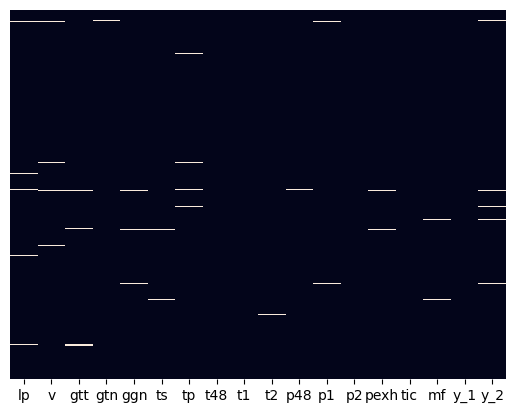

In [527]:
sns.heatmap(df.isnull(),yticklabels= False, cbar= False)
plt.savefig('null_values.png')
plt.show()

In [74]:
df.sample(5)

lp     v        gtt       gtn       ggn       ts       tp       t48  \
1912  9.300  27.0  72776.398  3560.422  9771.621  644.796  644.796  1077.082   
5082  1.138   3.0   1910.008  1334.168  6621.366    6.622    6.622   510.793   
2968  5.140  15.0  21637.514  1924.350  8506.975  175.332  175.332   704.348   
2150  2.088   6.0   4115.088  1390.668  6786.900   30.786   30.786   529.940   
5354  2.088   6.0   2866.631  1361.549  6844.800   25.388   25.388   502.130   

         t1       t2    p48     p1      p2   pexh     tic     mf    y_1    y_2  
1912  288.0  779.398  4.498  0.998  22.420  1.050  89.060  1.763  0.969  0.994  
5082  288.0  551.901  1.157  0.998   6.263  1.019  21.092  0.154  0.983  0.984  
2968  288.0  639.215  2.075  0.998  10.950  1.026  24.876  0.492  0.959  0.998  
2150  288.0  563.013  1.249  0.998   6.741  1.020   0.000  0.160  0.982  0.983  
5354  288.0  559.507  1.198  0.998   6.403  1.019  11.092  0.135  0.961  0.995

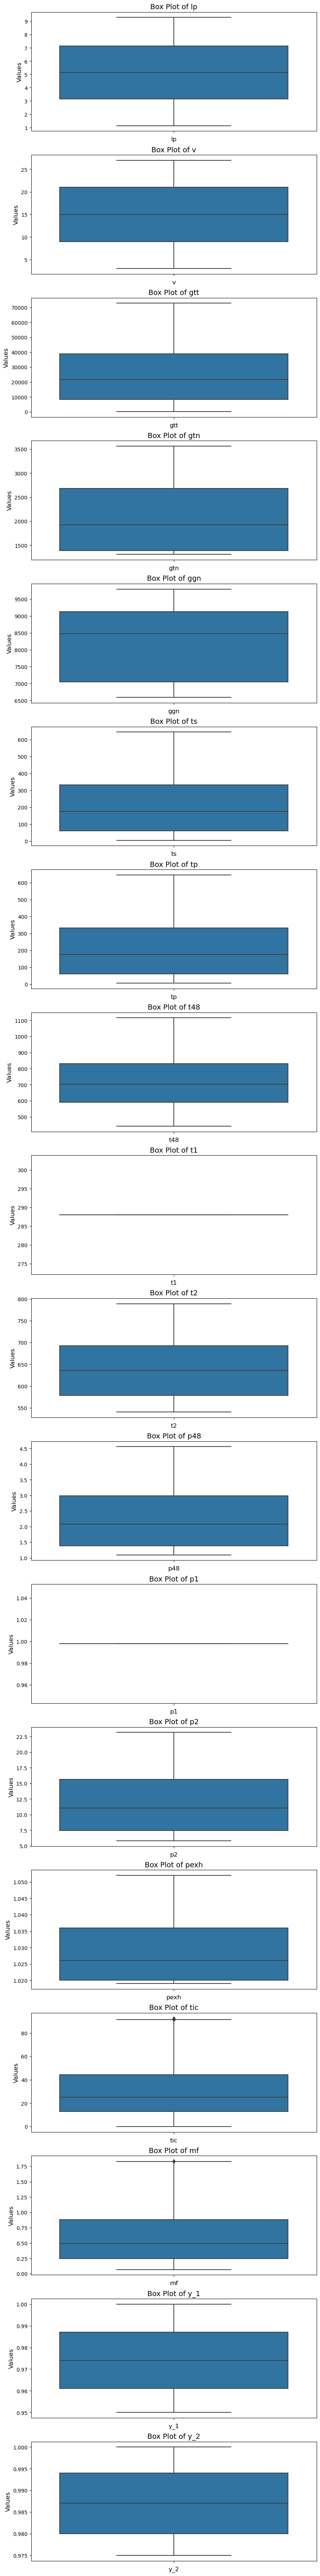

In [528]:
num_features = len(df.columns)

# Set the figure size
plt.figure(figsize=(10, 5 * num_features))

# Create box plots for each feature in a vertical arrangement
for i, col in enumerate(df.columns):
    plt.subplot(num_features, 1, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('box.png')
plt.show()

In [143]:
num_cols = [cols for cols in df.columns if df[cols].dtype != 'O']

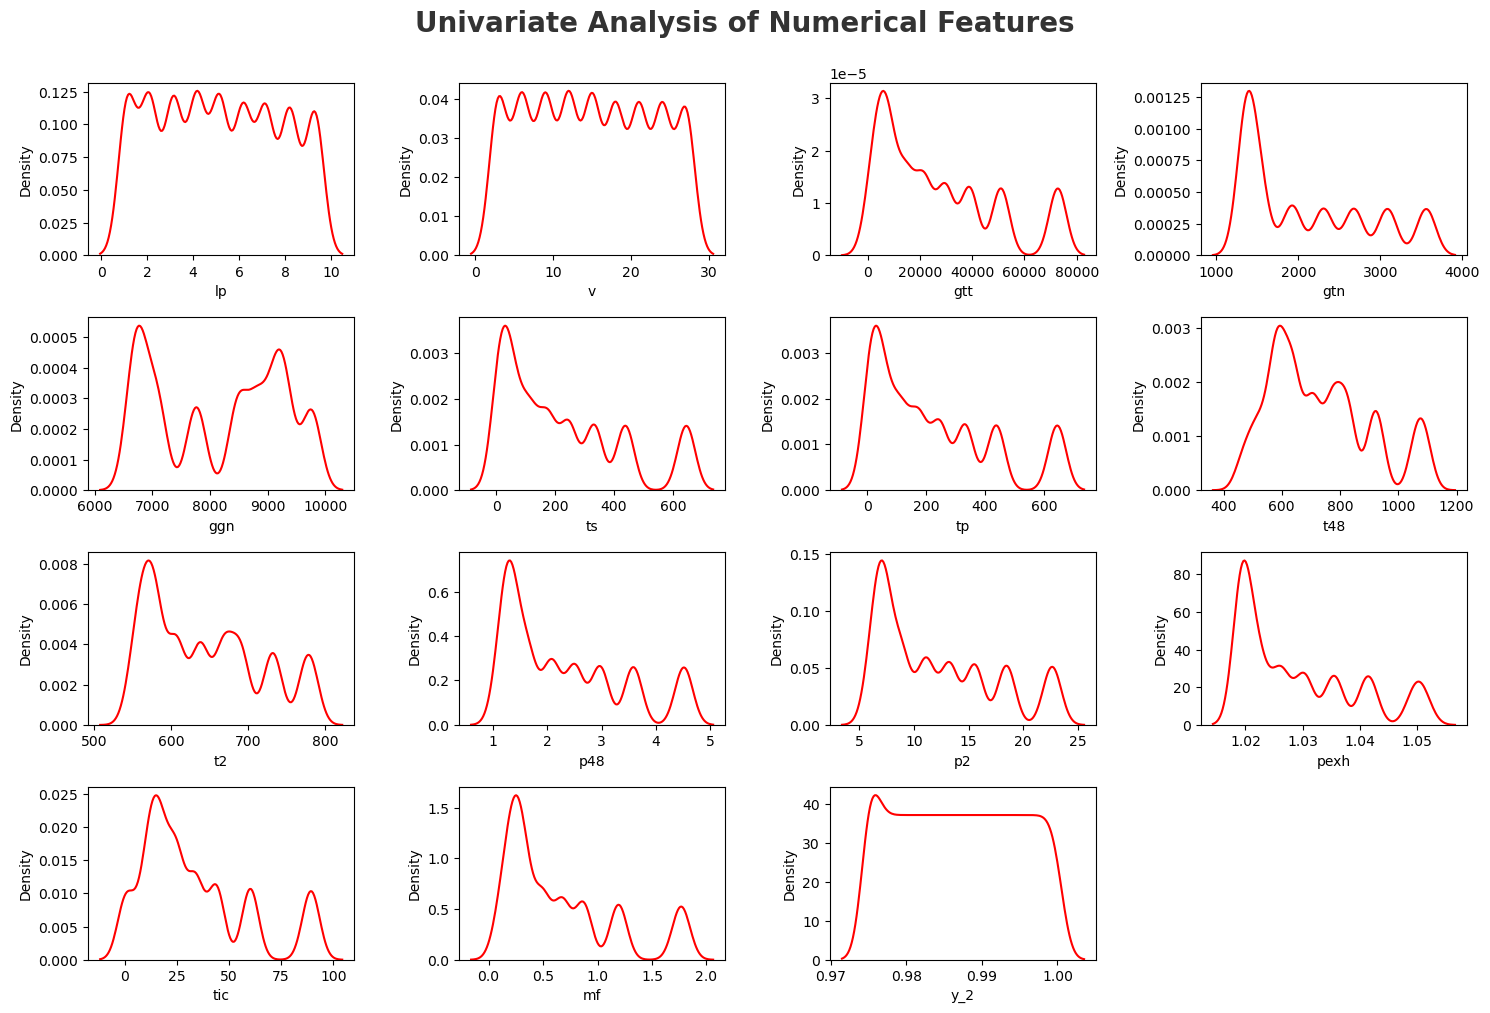

In [529]:
plt.figure(figsize=(15, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='r')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
plt.savefig('univariate.png')

In [78]:
df.corr(numeric_only=True)

lp         v       gtt       gtn       ggn        ts        tp  \
lp    1.000000  0.999916  0.961113  0.961515  0.985971  0.959226  0.959212   
v     0.999916  1.000000  0.958356  0.959867  0.986559  0.956392  0.956380   
gtt   0.961113  0.958356  1.000000  0.989665  0.933109  0.999141  0.999144   
gtn   0.961515  0.959867  0.989665  1.000000  0.942581  0.988654  0.988640   
ggn   0.985971  0.986559  0.933109  0.942581  1.000000  0.929805  0.929750   
ts    0.959226  0.956392  0.999141  0.988654  0.929805  1.000000  1.000000   
tp    0.959212  0.956380  0.999144  0.988640  0.929750  1.000000  1.000000   
t48   0.961198  0.958808  0.990583  0.978510  0.939475  0.985158  0.985223   
t1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
t2    0.982754  0.981189  0.990184  0.988784  0.966691  0.987270  0.987265   
p48   0.962947  0.960530  0.998890  0.995080  0.937405  0.998006  0.998005   
p1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
p2    0.969028  0.966921  0.997603  0.995955  0.945939  0.996186  0.996185   
pexh  0.952986  0.950485  0.995915  0.994087  0.924046  0.996198  0.996193   
tic   0.913977  0.910407  0.978073  0.962689  0.879635  0.977717  0.977704   
mf    0.931522  0.927951  0.995058  0.980207  0.897083  0.994283  0.994296   
y_1   0.028109  0.026908  0.029905  0.029155  0.008870  0.028569  0.027404   
y_2   0.026804  0.025854  0.026283  0.026794  0.035671  0.026144  0.025245   

           t48  t1        t2       p48  p1        p2      pexh       tic  \
lp    0.961198 NaN  0.982754  0.962947 NaN  0.969028  0.952986  0.913977   
v     0.958808 NaN  0.981189  0.960530 NaN  0.966921  0.950485  0.910407   
gtt   0.990583 NaN  0.990184  0.998890 NaN  0.997603  0.995915  0.978073   
gtn   0.978510 NaN  0.988784  0.995080 NaN  0.995955  0.994087  0.962689   
ggn   0.939475 NaN  0.966691  0.937405 NaN  0.945939  0.924046  0.879635   
ts    0.985158 NaN  0.987270  0.998006 NaN  0.996186  0.996198  0.977717   
tp    0.985223 NaN  0.987265  0.998005 NaN  0.996185  0.996193  0.977704   
t48   1.000000 NaN  0.992079  0.988685 NaN  0.989833  0.978912  0.969095   
t1         NaN NaN       NaN       NaN NaN       NaN       NaN       NaN   
t2    0.992079 NaN  1.000000  0.991528 NaN  0.994253  0.983069  0.958877   
p48   0.988685 NaN  0.991528  1.000000 NaN  0.999402  0.997886  0.975948   
p1         NaN NaN       NaN       NaN NaN       NaN       NaN       NaN   
p2    0.989833 NaN  0.994253  0.999402 NaN  1.000000  0.996253  0.972392   
pexh  0.978912 NaN  0.983069  0.997886 NaN  0.996253  1.000000  0.974432   
tic   0.969095 NaN  0.958877  0.975948 NaN  0.972392  0.974432  1.000000   
mf    0.985875 NaN  0.976456  0.992714 NaN  0.989287  0.990831  0.985642   
y_1  -0.015399 NaN -0.020015  0.035424 NaN  0.036324  0.061916 -0.006530   
y_2  -0.015832 NaN  0.007741  0.024166 NaN  0.009114  0.038168  0.004697   

            mf       y_1       y_2  
lp    0.931522  0.028109  0.026804  
v     0.927951  0.026908  0.025854  
gtt   0.995058  0.029905  0.026283  
gtn   0.980207  0.029155  0.026794  
ggn   0.897083  0.008870  0.035671  
ts    0.994283  0.028569  0.026144  
tp    0.994296  0.027404  0.025245  
t48   0.985875 -0.015399 -0.015832  
t1         NaN       NaN       NaN  
t2    0.976456 -0.020015  0.007741  
p48   0.992714  0.035424  0.024166  
p1         NaN       NaN       NaN  
p2    0.989287  0.036324  0.009114  
pexh  0.990831  0.061916  0.038168  
tic   0.985642 -0.006530  0.004697  
mf    1.000000  0.013201  0.008338  
y_1   0.013201  1.000000  0.058130  
y_2   0.008338  0.058130  1.000000

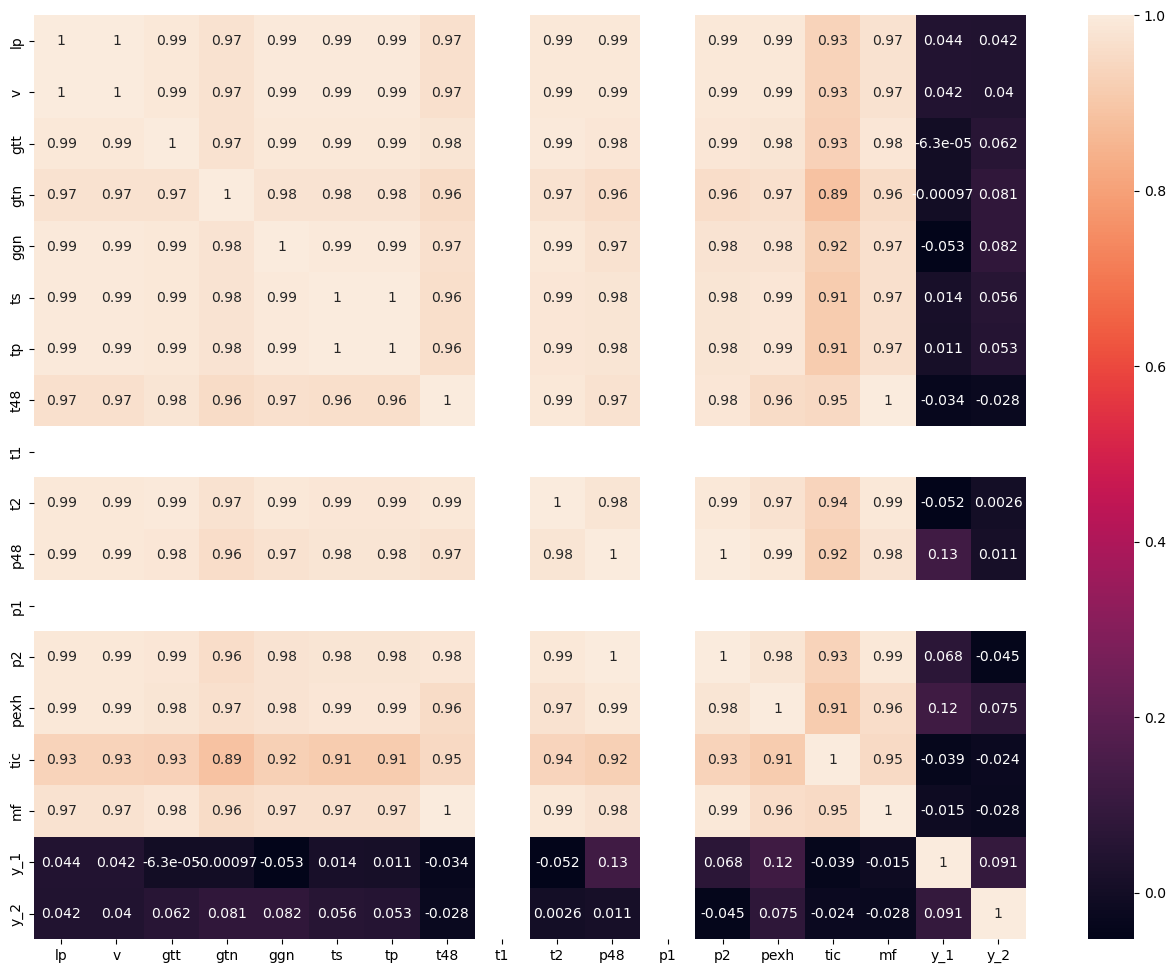

In [530]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True, method='spearman'), annot = True)
plt.savefig('univariate.png')
plt.show()

In [146]:
df.duplicated().sum()

0

In [165]:
df

lp     v        gtt       gtn       ggn       ts       tp       t48  \
0      5.140  15.0  21640.162  1924.358  8516.691  175.324  175.324   706.702   
1      9.300  27.0  72776.229  3560.412  9759.837  645.137  645.137  1060.156   
2      8.206  24.0  50994.673  3087.535  9313.854  438.110  438.110   927.728   
3      5.140  15.0  21626.805  1924.329  8472.097  175.221  175.221   695.477   
4      5.140  15.0  21636.430  1924.313  8494.777      NaN      NaN   731.494   
...      ...   ...        ...       ...       ...      ...      ...       ...   
12429  9.300  27.0  72774.292  3560.407  9753.571  644.796  644.796  1055.580   
12430  6.175  18.0  29796.511  2307.266  8840.516  246.316  246.316   780.537   
12431  5.140  15.0  21625.687  1924.321  8466.713  175.249  175.249   699.706   
12432  4.161  12.0  14718.853  1547.451  7728.002  113.727  113.727   631.711   
12433  2.088   6.0   3217.569  1350.216  6786.171   23.347   23.347   525.820   

          t1       t2    p48     p1      p2   pexh     tic     mf    y_1  \
0      288.0  640.873  2.072  0.998  10.916  1.026  24.960  0.494  0.951   
1      288.0  774.302  4.511  0.998  22.426  1.051  87.741  1.737  0.982   
2      288.0  734.474  3.577  0.998  18.412  1.041  60.546  1.199  0.966   
3      288.0  633.124  2.086  0.998  11.074  1.027  24.549  0.486  0.989   
4      288.0  645.642  2.078  0.998  11.197  1.026  26.373  0.522  0.950   
...      ...      ...    ...    ...     ...    ...     ...    ...    ...   
12429  288.0  772.682  4.519  0.998  22.485  1.051  87.460  1.731  0.987   
12430  288.0  671.845  2.497  0.998  13.144  1.030  34.498  0.683  0.954   
12431  288.0  633.775  2.088  0.998  11.132  1.027  24.802  0.491  0.990   
12432  288.0  603.073  1.663  0.998   8.927  1.023  16.827  0.333  0.990   
12433  288.0  561.995  1.209  0.998   6.558  1.019  18.305  0.165  0.967   

         y_2  
0      1.000  
1      0.997  
2      0.988  
3      0.991  
4      0.975  
...      ...  
12429  0.996  
12430  0.991  
12431  0.986  
12432  0.988  
12433  0.980  

[12281 rows x 18 columns]

In [354]:
df1 = df.copy()

In [355]:
df1.drop(['t1', 'p1','y_1'], axis=1, inplace = True)

In [356]:
df1.describe()

lp             v           gtt           gtn           ggn  \
count  12238.000000  12231.000000  12241.000000  12233.000000  12240.000000   
mean       5.116120     14.854550  26828.245355   2121.210724   8180.432811   
std        2.622234      7.734221  22054.512083    771.198264   1090.356524   
min        1.138000      3.000000    253.547000   1307.675000   6589.002000   
25%        3.144000      9.000000   8375.662000   1386.757000   7053.889000   
50%        5.140000     15.000000  21629.513000   1924.322000   8478.630000   
75%        7.148000     21.000000  38999.242000   2678.078000   9131.176750   
max        9.300000     27.000000  72784.872000   3560.741000   9797.103000   

                 ts            tp           t48            t2           p48  \
count  12241.000000  12234.000000  12222.000000  12242.000000  12240.000000   
mean     223.507265    223.672524    732.767198    644.941436      2.332201   
std      199.616116    199.580213    173.035639     72.358227      1.080207   
min        5.304000      5.304000    442.364000    540.442000      1.093000   
25%       60.315000     60.315250    590.128000    578.203250      1.389000   
50%      175.259000    175.259000    704.230500    636.186500      2.081000   
75%      332.345000    332.345000    831.789500    693.012750      2.979000   
max      645.249000    645.249000   1115.797000    789.094000      4.560000   

                 p2          pexh           tic            mf           y_2  
count  12243.000000  12231.000000  12223.000000  12248.000000  12233.000000  
mean      12.193657      1.029272     33.205465      0.653251      0.987194  
std        5.316026      0.010351     25.706487      0.504267      0.007655  
min        5.828000      1.019000      0.000000      0.068000      0.975000  
25%        7.441000      1.020000     13.072000      0.246000      0.981000  
50%       11.071000      1.026000     25.180000      0.494000      0.987000  
75%       15.632000      1.036000     44.407500      0.879000      0.994000  
max       23.140000      1.052000     92.556000      1.832000      1.000000

In [357]:
df1.isnull().sum()

lp      43
v       50
gtt     40
gtn     48
ggn     41
ts      40
tp      47
t48     59
t2      39
p48     41
p2      38
pexh    50
tic     58
mf      33
y_2     48
dtype: int64

In [358]:
df1.isnull().sum().to_frame().T

lp   v  gtt  gtn  ggn  ts  tp  t48  t2  p48  p2  pexh  tic  mf  y_2
0  43  50   40   48   41  40  47   59  39   41  38    50   58  33   48

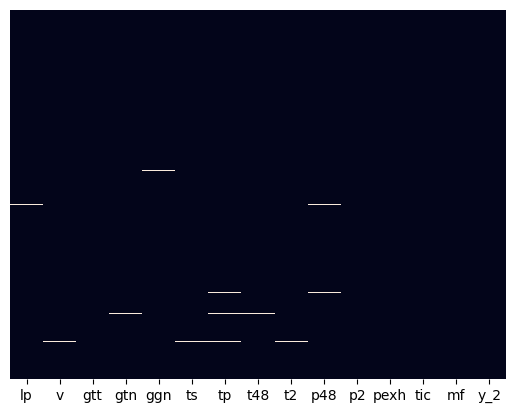

In [359]:
#plt.figure(figsize=(10,6))
sns.heatmap(df1.isnull(),yticklabels= False, cbar= False)
#plt.savefig('null_values.png')
plt.show()

In [368]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

In [369]:
df_imputed.isnull().sum().sum()

0

In [370]:
df_imputed.duplicated().sum()

336

In [371]:
df_imputed.head()

lp     v        gtt       gtn       ggn       ts       tp       t48  \
0  5.140  15.0  21640.162  1924.358  8516.691  175.324  175.324   706.702   
1  9.300  27.0  72776.229  3560.412  9759.837  645.137  645.137  1060.156   
2  8.206  24.0  50994.673  3087.535  9313.854  438.110  438.110   927.728   
3  5.140  15.0  21626.805  1924.329  8472.097  175.221  175.221   695.477   
4  5.140  15.0  21636.430  1924.313  8494.777  175.306  175.306   731.494   

        t2    p48      p2   pexh     tic     mf    y_2  
0  640.873  2.072  10.916  1.026  24.960  0.494  1.000  
1  774.302  4.511  22.426  1.051  87.741  1.737  0.997  
2  734.474  3.577  18.412  1.041  60.546  1.199  0.988  
3  633.124  2.086  11.074  1.027  24.549  0.486  0.991  
4  645.642  2.078  11.197  1.026  26.373  0.522  0.975

In [372]:
df_imputed.describe()

lp             v           gtt          gtn           ggn  \
count  12281.000000  12281.000000  12281.000000  12281.00000  12281.000000   
mean       5.109906     14.832424  26774.313867   2118.74256   8177.978631   
std        2.620995      7.731051  22041.524952    770.78060   1089.917604   
min        1.138000      3.000000    253.547000   1307.67500   6589.002000   
25%        3.144000      9.000000   8375.654000   1386.75700   7053.712000   
50%        5.140000     15.000000  21629.333000   1924.32100   8478.170000   
75%        7.148000     21.000000  38998.912000   2678.07700   9130.997000   
max        9.300000     27.000000  72784.872000   3560.74100   9797.103000   

                 ts            tp           t48            t2           p48  \
count  12281.000000  12281.000000  12281.000000  12281.000000  12281.000000   
mean     223.107265    223.107265    732.266594    644.804375      2.329220   
std      199.445712    199.445712    172.862048     72.310264      1.079767   
min        5.304000      5.304000    442.364000    540.442000      1.093000   
25%       60.315000     60.315000    590.217000    578.234000      1.389000   
50%      175.259000    175.259000    703.850000    636.117000      2.081000   
75%      332.339000    332.339000    831.406000    692.880000      2.979000   
max      645.249000    645.249000   1115.797000    789.094000      4.560000   

                 p2          pexh           tic            mf           y_2  
count  12281.000000  12281.000000  12281.000000  12281.000000  12281.000000  
mean      12.181773      1.029240     33.117689      0.652286      0.987147  
std        5.312905      0.010343     25.681547      0.503993      0.007678  
min        5.828000      1.019000      0.000000      0.068000      0.975000  
25%        7.441000      1.020000     13.015000      0.246000      0.980000  
50%       11.068000      1.026000     25.162000      0.494000      0.987000  
75%       15.629000      1.036000     44.382000      0.879000      0.994000  
max       23.140000      1.052000     92.556000      1.832000      1.000000

In [373]:
df_imputed.duplicated().sum()

336

In [455]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [456]:
corr_features = correlation(df_imputed, 0.95)
len(set(corr_features))

12

# Multicolinearity check

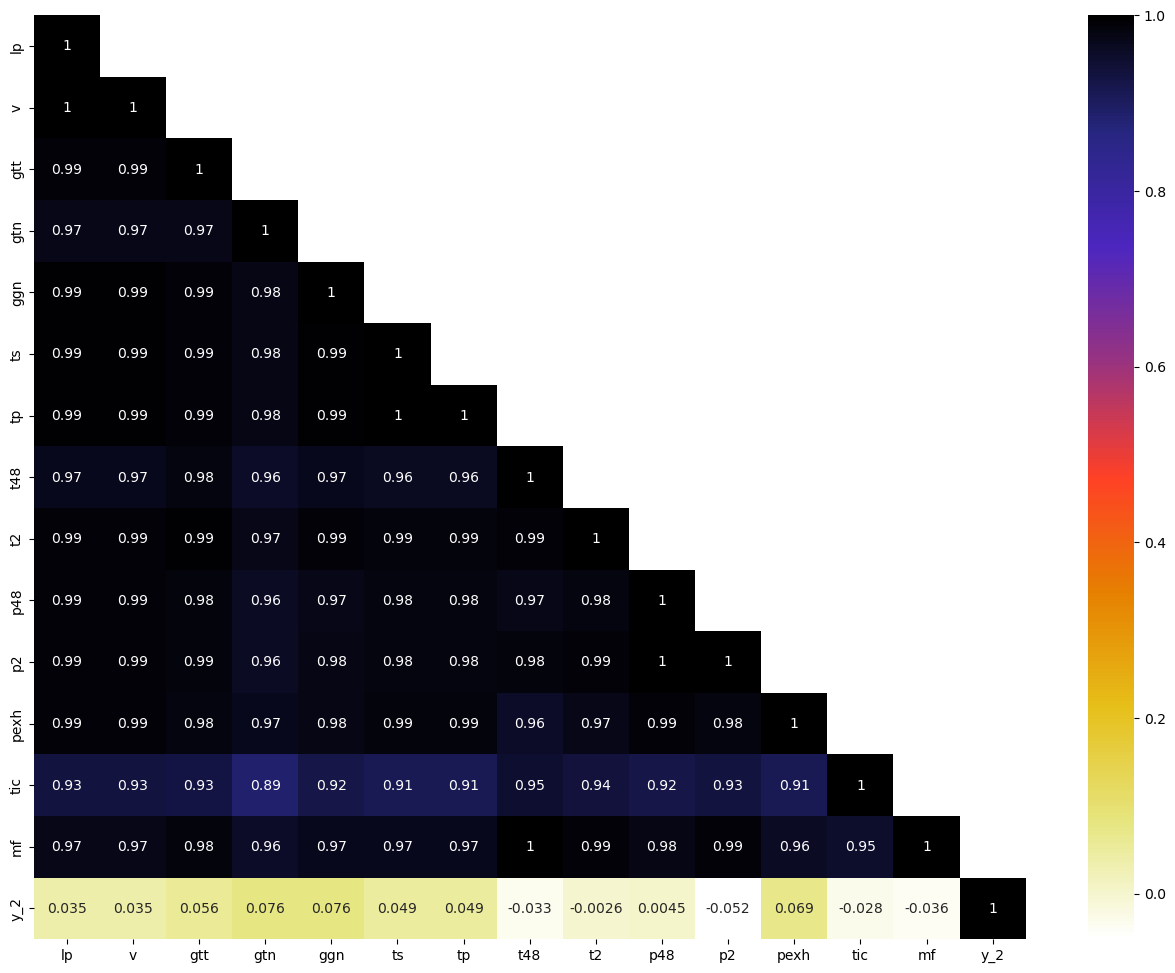

In [366]:
plt.figure(figsize=(16,12))
sns.heatmap(df_imputed.corr(numeric_only=True,method='spearman'), cmap='CMRmap_r', annot = True, mask = np.triu(df_imputed.corr(numeric_only=True), k=1))
plt.show()

In [367]:
num_cols = [cols for cols in df_imputed.columns if df_imputed[cols].dtype != 'O']

In [178]:
num_cols

['lp',
 'v',
 'gtt',
 'gtn',
 'ggn',
 'ts',
 'tp',
 't48',
 't2',
 'p48',
 'p2',
 'pexh',
 'tic',
 'mf',
 'y_2']

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(provided_features, df):
    X = df[provided_features]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [179]:
compute_vif(num_cols, df_imputed)

Variable           VIF
0        lp  4.182897e+04
1         v  3.593633e+04
2       gtt  3.594344e+04
3       gtn  2.076585e+03
4       ggn  4.933077e+02
5        ts           inf
6        tp           inf
7       t48  6.017449e+03
8        t2  1.530424e+03
9       p48  3.334107e+04
10       p2  2.214146e+04
11     pexh  1.291398e+03
12      tic  7.234065e+01
13       mf  1.730938e+04
14      y_2  1.125156e+01

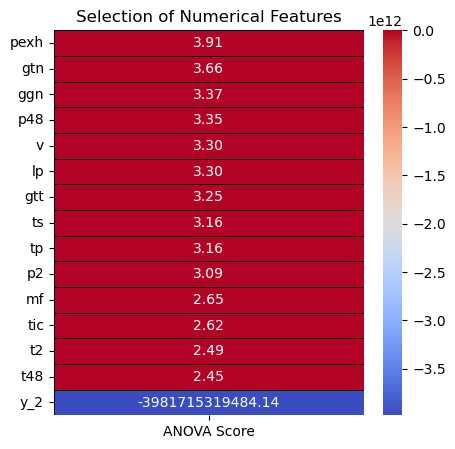

In [180]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df_imputed.loc[:,num_cols]
target = df_imputed.loc[:,'y_2']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

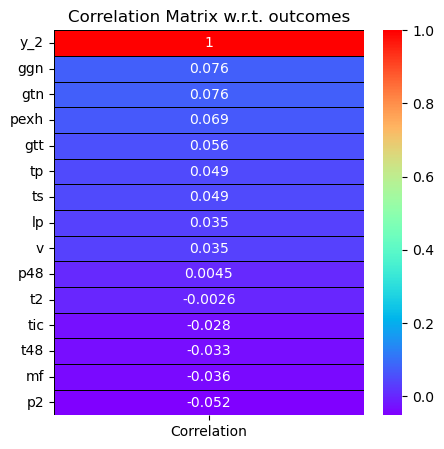

In [181]:
corr = df_imputed.corrwith(df_imputed['y_2'],method='spearman').sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [182]:
df_imputed2 = df_imputed.copy()

In [183]:
df_imputed2 = df_imputed2.drop(columns =['lp','tp'] )

In [184]:
num_cols = [cols for cols in df_imputed2.columns if df_imputed2[cols].dtype != 'O']

In [185]:
compute_vif(num_cols, df_imputed2)

Variable           VIF
0         v    911.321849
1       gtt  34415.988852
2       gtn   1680.955729
3       ggn    471.852011
4        ts  30921.668874
5       t48   5832.767985
6        t2    990.933894
7       p48  33303.495777
8        p2  21667.339383
9      pexh   1194.904941
10      tic     68.957329
11       mf  16677.370405
12      y_2     11.248583

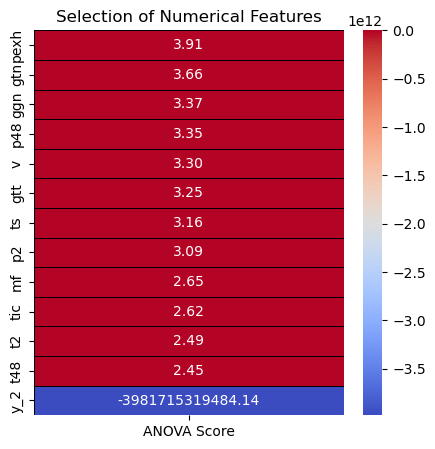

In [186]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df_imputed2.loc[:,num_cols]
target = df_imputed2.loc[:,'y_2']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

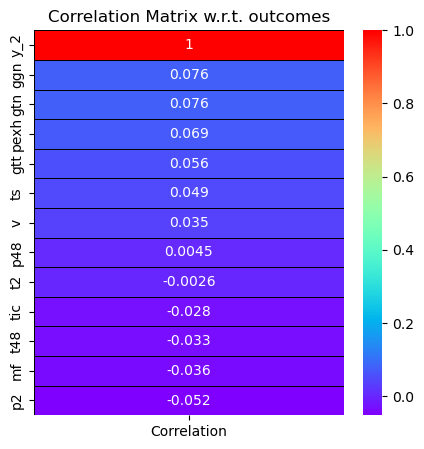

In [188]:
corr = df_imputed2.corrwith(df_imputed2['y_2'], method='spearman').sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [189]:
df_imputed3 = df_imputed2.copy()

In [190]:
df_imputed3 = df_imputed2.drop(columns =['gtn'] )

In [191]:
num_cols = [cols for cols in df_imputed3.columns if df_imputed3[cols].dtype != 'O']

In [192]:
compute_vif(num_cols, df_imputed3)

Variable           VIF
0         v    518.690501
1       gtt  17980.056854
2       ggn    316.566362
3        ts  21413.640865
4       t48   4461.480612
5        t2    954.085556
6       p48  26771.524813
7        p2  18379.939562
8      pexh   1166.209645
9       tic     63.761759
10       mf  10904.957020
11      y_2      8.028856

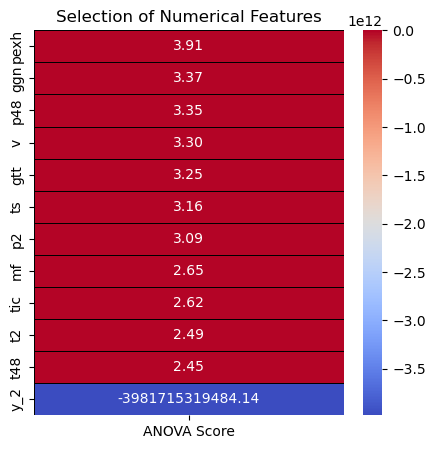

In [193]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df_imputed3.loc[:,num_cols]
target = df_imputed3.loc[:,'y_2']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

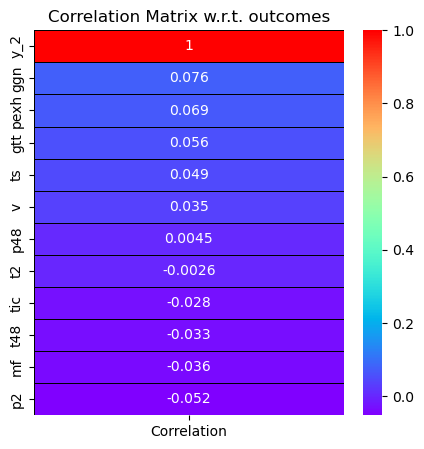

In [194]:
corr = df_imputed3.corrwith(df_imputed3['y_2'],method='spearman').sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

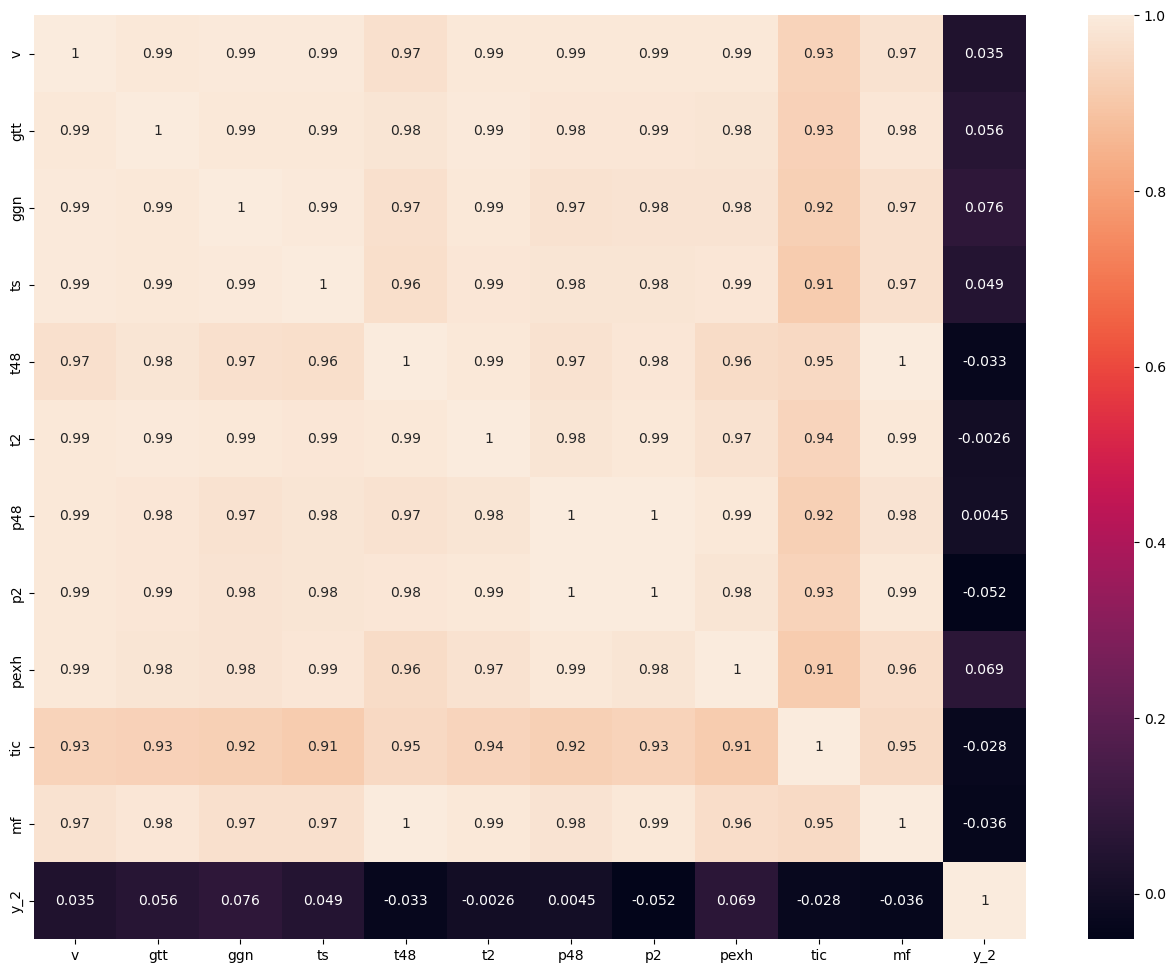

In [195]:
plt.figure(figsize=(16,12))
sns.heatmap(df_imputed3.corr(method='spearman'), annot = True)
plt.show()

In [154]:
# outlier detection

In [202]:
def detect_outlier(col):
    Q1 = df_imputed3[col].quantile(0.25)
    Q3 = df_imputed3[col].quantile(0.75)
    print("\n ****",col, '****')
    print(f"Q3:{Q3} | Q1:{Q1}")
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    print('Upper Limit',UL)
    print('Lower Limit',LL)
    df_imputed3.loc[(df_imputed3[col]>UL), col] = UL
    df_imputed3.loc[(df_imputed3[col]<LL), col] = LL
    return df_imputed3

In [203]:
num_cols = [cols for cols in df_imputed3.columns if df_imputed3[cols].dtype != 'O']
for col in num_cols:
    detect_outlier(col)


 **** v ****
Q3:21.0 | Q1:9.0
Upper Limit 39.0
Lower Limit -9.0

 **** gtt ****
Q3:38998.912 | Q1:8375.654
Upper Limit 84933.79899999998
Lower Limit -37559.232999999986

 **** ggn ****
Q3:9130.997 | Q1:7053.712
Upper Limit 12246.924499999997
Lower Limit 3937.784500000002

 **** ts ****
Q3:332.339 | Q1:60.315
Upper Limit 740.375
Lower Limit -347.721

 **** t48 ****
Q3:831.406 | Q1:590.217
Upper Limit 1193.1895
Lower Limit 228.43350000000004

 **** t2 ****
Q3:692.88 | Q1:578.234
Upper Limit 864.8489999999999
Lower Limit 406.2650000000001

 **** p48 ****
Q3:2.979 | Q1:1.389
Upper Limit 5.364000000000001
Lower Limit -0.9960000000000002

 **** p2 ****
Q3:15.629 | Q1:7.441
Upper Limit 27.910999999999998
Lower Limit -4.840999999999998

 **** pexh ****
Q3:1.036 | Q1:1.02
Upper Limit 1.06
Lower Limit 0.996

 **** tic ****
Q3:44.382 | Q1:13.015
Upper Limit 91.4325
Lower Limit -34.0355

 **** mf ****
Q3:0.879 | Q1:0.246
Upper Limit 1.8285
Lower Limit -0.7035

 **** y_2 ****
Q3:0.994 | Q1:0.98
Up

In [200]:
import dtale

In [204]:
dtale.show(df_imputed3)

In [535]:
lst = [1,'a']

In [537]:
lst[1]

'a'

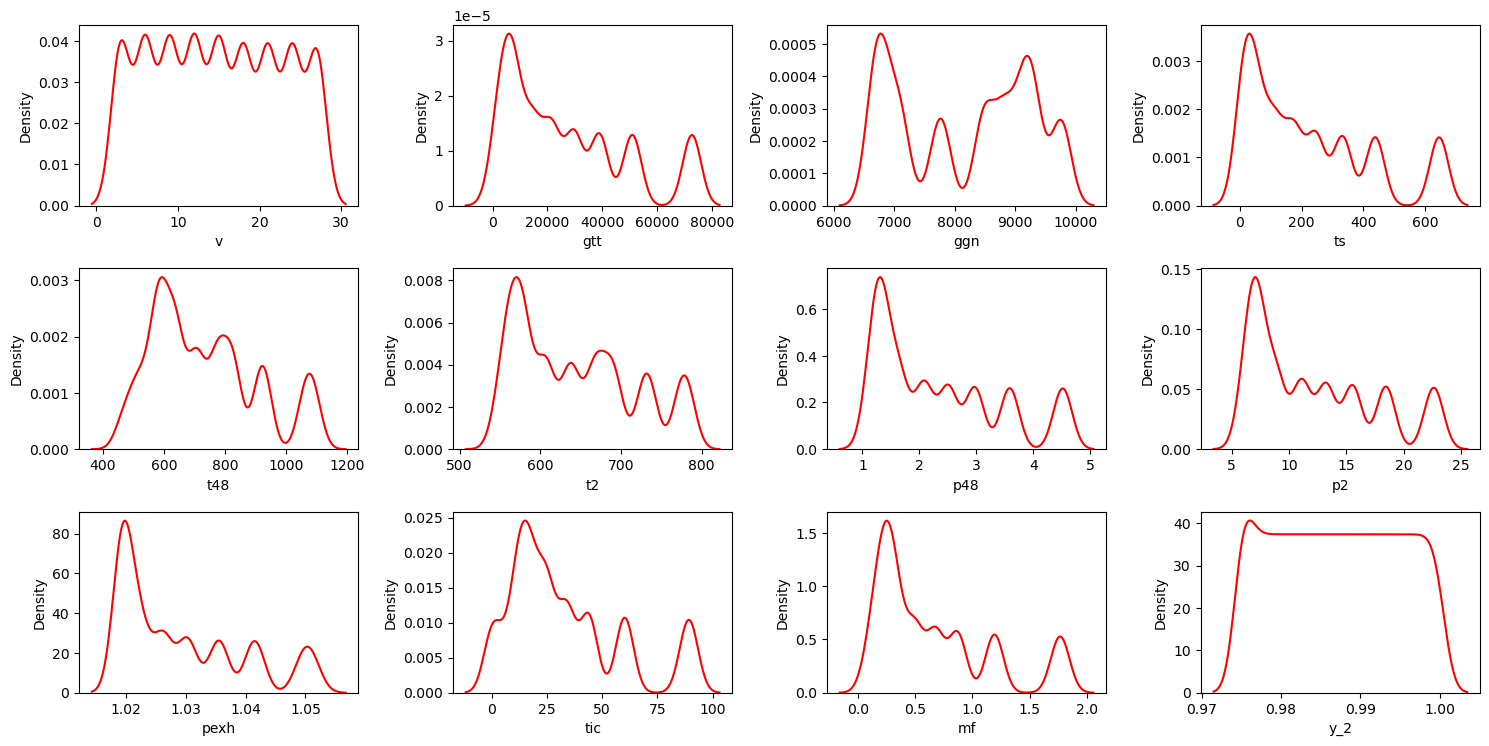

In [205]:
plt.figure(figsize=(15, 12))


for i in range(0, len(num_cols)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=df_imputed3[num_cols[i]], color='r')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

In [207]:
df_imputed3.duplicated().sum()

339

In [219]:
df_imputed3 = df_imputed3.drop_duplicates()

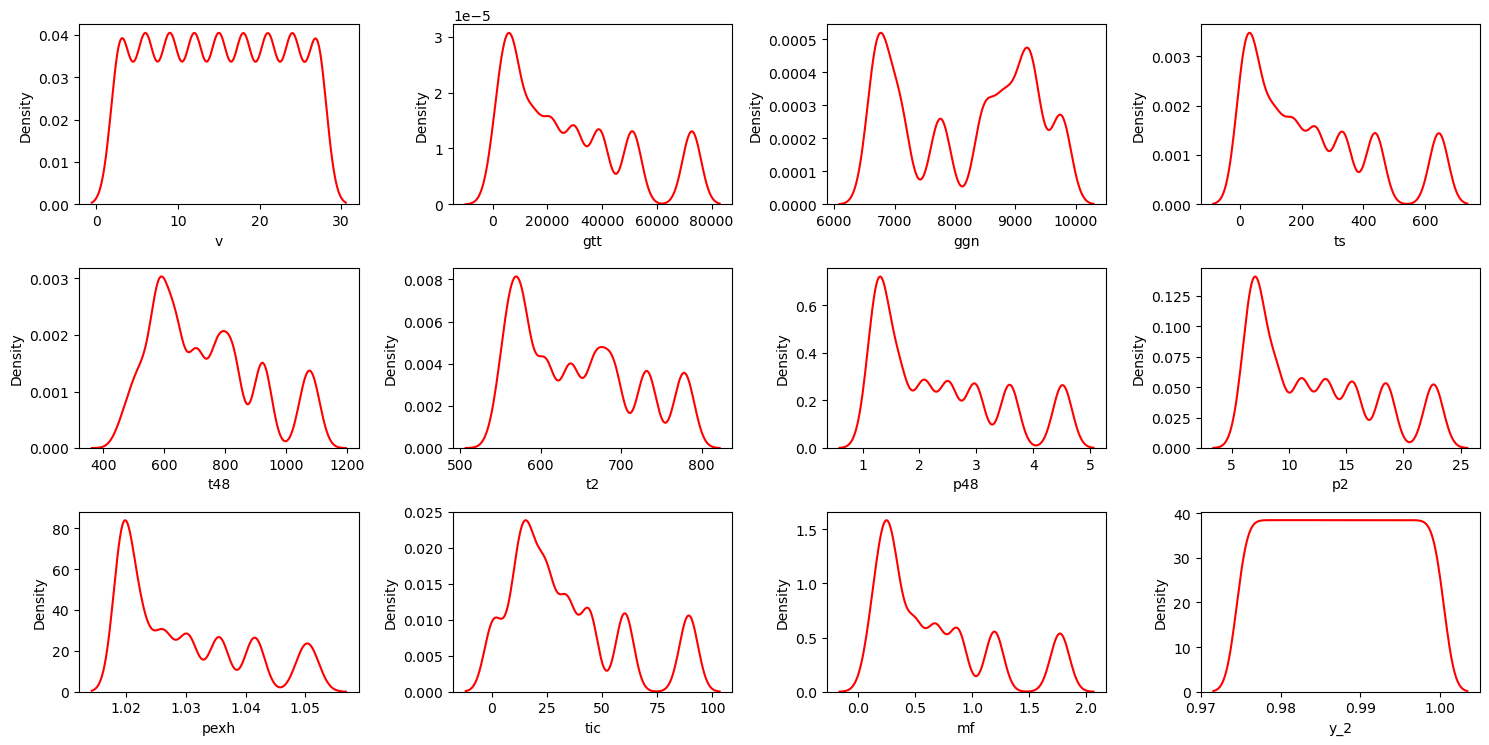

In [220]:
plt.figure(figsize=(15, 12))


for i in range(0, len(num_cols)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=df_imputed3[num_cols[i]], color='r')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

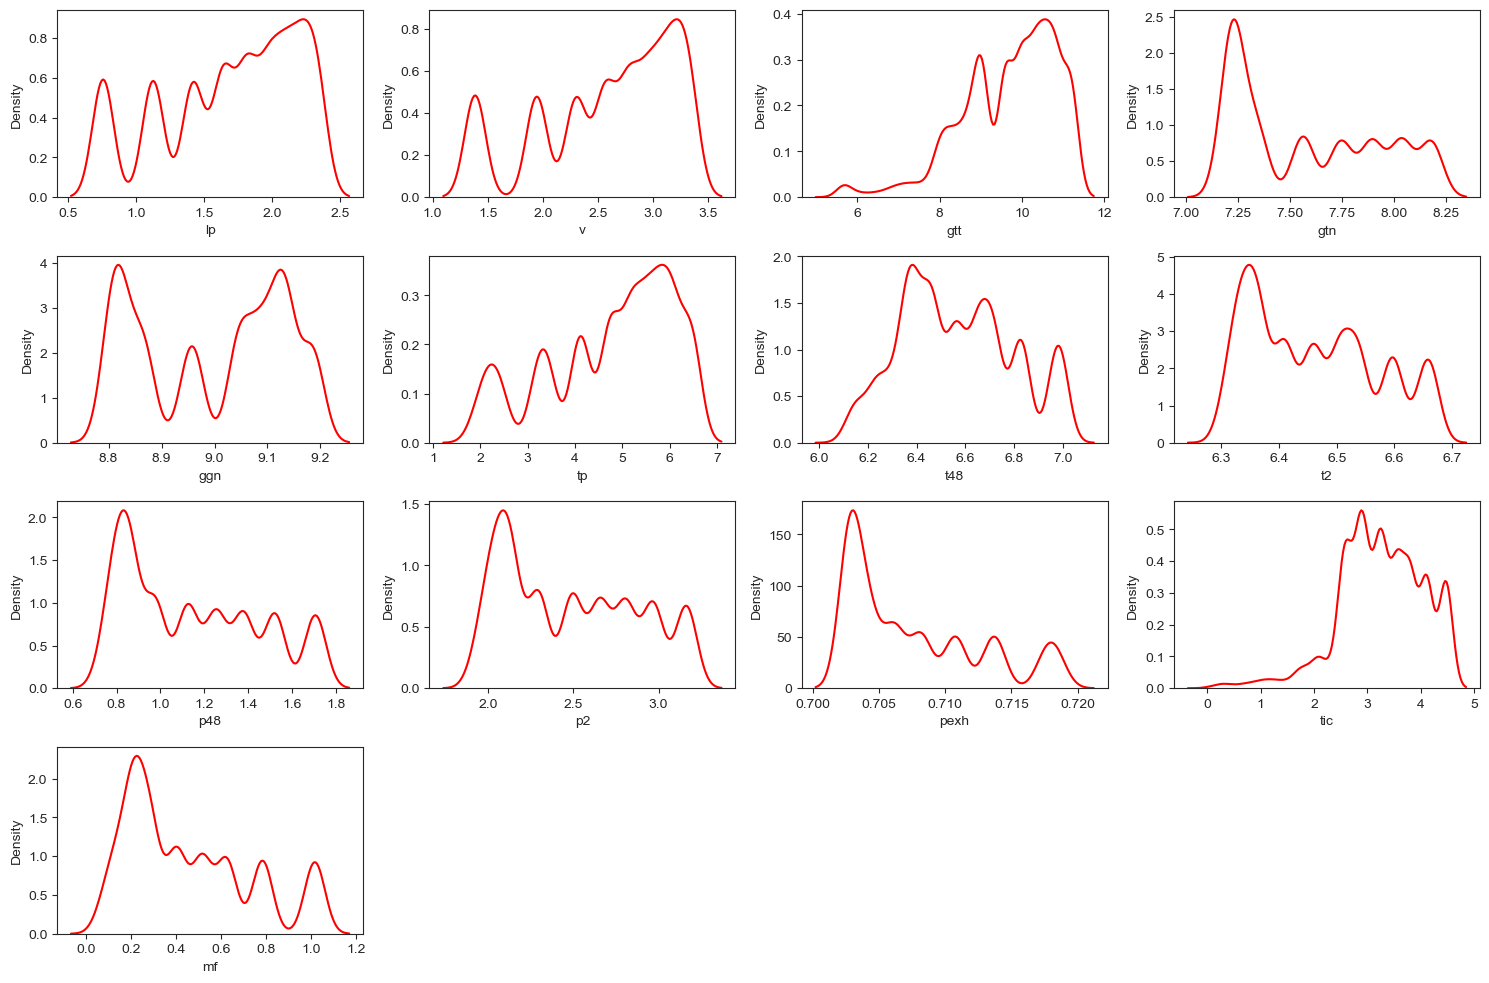

In [615]:
plt.figure(figsize=(15, 12))


for i in range(0, len(num_cols)-2):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x=xtrain_tr[num_cols[i]], color='r')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

In [221]:
cols1 = df_imputed3.columns

In [222]:
df_imputed3[cols1].skew(axis=0, skipna=True)

v       0.000720
gtt     0.766046
ggn    -0.138950
ts      0.807794
t48     0.560999
t2      0.426391
p48     0.707739
p2      0.629353
pexh    0.773874
tic     0.896932
mf      1.000281
y_2     0.000252
dtype: float64

In [541]:
dtale.show(df_imputed)

In [223]:
x = df_imputed3.drop(['y_2'], axis=1)
y = df_imputed3['y_2']

In [224]:
import statsmodels.api as sm
from scipy import stats

In [225]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [354]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func= np.log1p)

In [355]:
trf = FunctionTransformer(func= np.log1p)
xtrain_tr = trf.transform(x_train)
xtest_tr = trf.transform(x_test)

((array([-3.80929566, -3.58407063, -3.46041733, ...,  3.46041733,
          3.58407063,  3.80929566]),
  array([  253.547,   267.668,   268.738, ..., 72782.999, 72783.338,
         72784.872])),
 (20548.227535026377, 26383.292950537845, 0.9369813066059973))

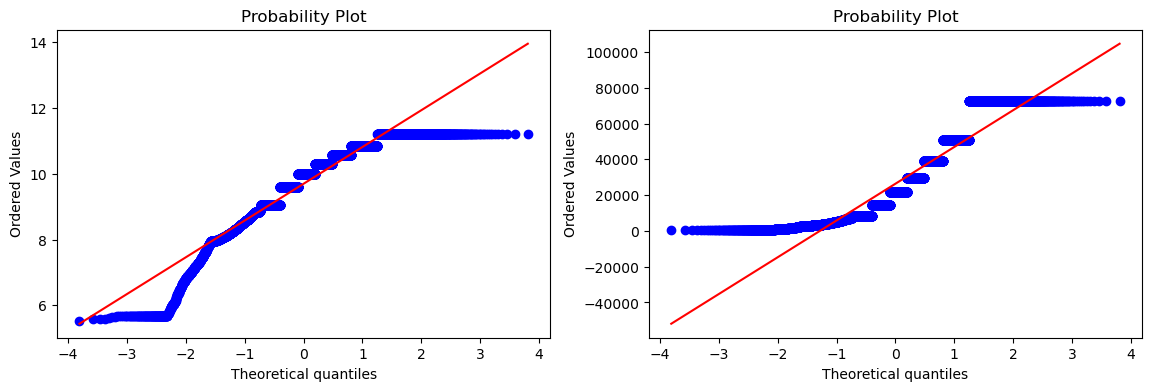

In [357]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(xtrain_tr['gtt'], dist='norm', plot=plt)

plt.subplot(122)
stats.probplot(x_train['gtt'], dist='norm', plot=plt)


### without transformation

In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(xtrain_tr)
x_test = scaler.transform(xtest_tr)

NameError: name 'xtrain_tr' is not defined

In [228]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred_test_linear = linear.predict(x_test)
y_pred_train_linear = linear.predict(x_train)
from sklearn import metrics
print(metrics.mean_squared_error(y_train, y_pred_train_linear))
print(metrics.mean_squared_error(y_test, y_pred_test_linear))

7.086347108749909e-06
7.273782730728679e-06


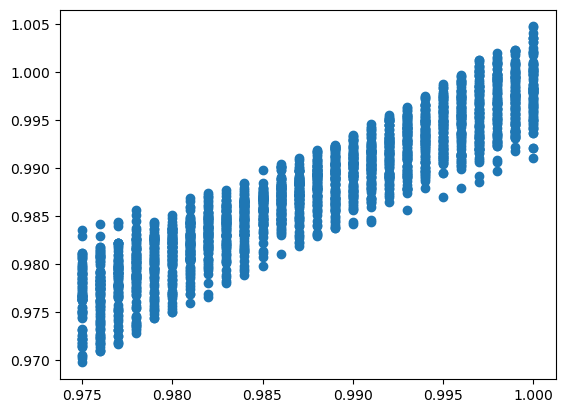

In [229]:
plt.scatter(y_test, y_pred_test_linear,)
plt.show()

In [230]:
from sklearn.metrics import r2_score
print("Accuracy :", r2_score(y_test, y_pred_test_linear))

Accuracy : 0.86921088609219


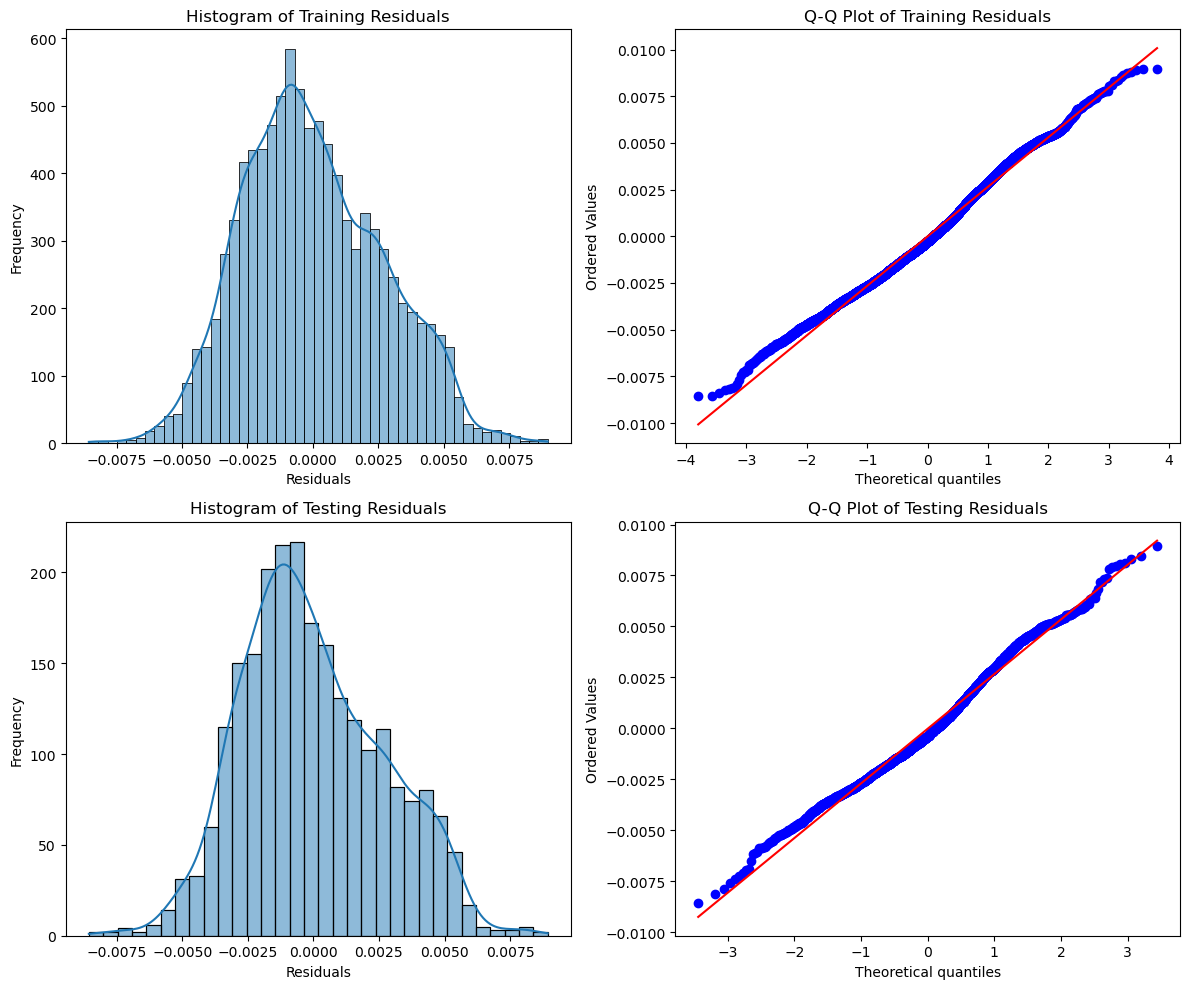

In [231]:
train_residuals = y_train - y_pred_train_linear
test_residuals = y_test - y_pred_test_linear

# Plot histogram and Q-Q plot for training residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for training residuals
sns.histplot(train_residuals, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Training Residuals')
axes[0, 0].set_xlabel('Residuals')
axes[0, 0].set_ylabel('Frequency')

# Q-Q plot for training residuals
stats.probplot(train_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Training Residuals')

# Histogram for testing residuals
sns.histplot(test_residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Testing Residuals')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')

# Q-Q plot for testing residuals
stats.probplot(test_residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Testing Residuals')

plt.tight_layout()
plt.show()

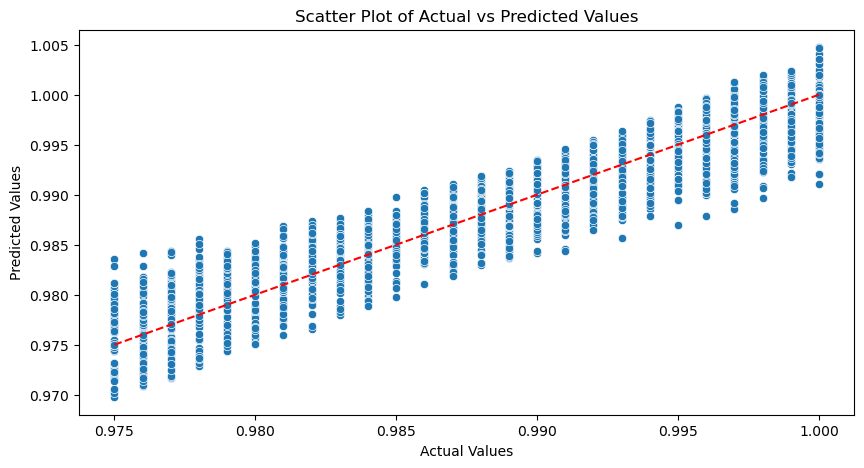

In [232]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_test_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

In [233]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(x_train, y_train)
print("Ridge Model :", ridge.coef_)

Ridge Model : [ 0.03339617  0.20606637  0.02669635 -0.2750391  -0.10096136  0.02894696
  0.26382539 -0.30369619  0.00459533 -0.00481297  0.12337171]


In [234]:
y_pred_ridge_train = ridge.predict(x_train)
y_pred_ridge_test = ridge.predict(x_test)

In [235]:
print("Ridge_Train_ACC :", r2_score(y_train, y_pred_ridge_train))
print()
print("Ridge_Test_ACC :", r2_score(y_test, y_pred_ridge_test))

Ridge_Train_ACC : 0.87455513771808

Ridge_Test_ACC : 0.8692138822167114


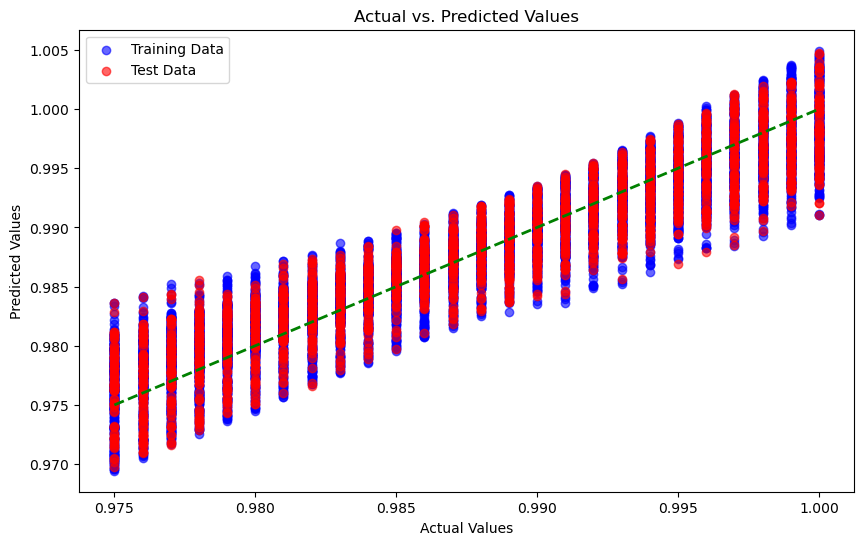

In [236]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(y_train, y_pred_ridge_train, color='blue', alpha=0.6, label='Training Data')

# Scatter plot for test data
plt.scatter(y_test, y_pred_ridge_test, color='red', alpha=0.6, label='Test Data')

# Add line of equality
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()

In [237]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [238]:
reg_model = smf.OLS(endog = y, exog=x).fit()

In [239]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    y_2   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.480e+08
Date:                Wed, 31 Jul 2024   Prob (F-statistic):                        0.00
Time:                        20:17:42   Log-Likelihood:                          53805.
No. Observations:               11942   AIC:                                 -1.076e+05
Df Residuals:                   11931   BIC:                                 -1.075e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
v              0.0043   5.95e-05     72.488      0.000       0.004       0.004
gtt          9.17e-06   1.23e-07     74.471      0.000    8.93e-06    9.41e-06
ggn         2.475e-05   3.25e-07     76.172      0.000    2.41e-05    2.54e-05
ts            -0.0014   1.29e-05   -105.894      0.000      -0.001      -0.001
t48           -0.0006   7.92e-06    -72.195      0.000      -0.001      -0.001
t2             0.0004   9.77e-06     41.652      0.000       0.000       0.000
p48            0.2375      0.003     90.382      0.000       0.232       0.243
p2            -0.0570      0.000   -167.177      0.000      -0.058      -0.056
pexh           0.8977      0.003    306.945      0.000       0.892       0.903
tic           -0.0002   7.29e-06    -25.783      0.000      -0.000      -0.000
mf             0.2451      0.005     54.381      0.000       0.236       0.254
==============================================================================
Omnibus:                      216.357   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.047
Skew:                           0.264   Prob(JB):                     4.43e-43
Kurtosis:                       2.663   Cond. No.                     6.95e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [240]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [241]:
models = {
    "Random Forest":RandomForestRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Gradient Boosting":GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Support Vector Regressorr":SVR(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)


    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #training set
    model_train_accuracy = r2_score(y_train, y_train_pred)
    model_train_mse = mean_squared_error(y_train, y_train_pred)
    model_train_mae = mean_absolute_error(y_train,y_train_pred)


    #test set
    model_test_accuracy = r2_score(y_test, y_test_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_mae = mean_absolute_error(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:0.9988
mse:0.0000
mae:0.0001
-----------------------------------
model performance for test set
Accuracy:0.9897
mse:0.0000
mae:0.0003


Decision Tree
model performance for training set
Accuracy:1.0000
mse:0.0000
mae:0.0000
-----------------------------------
model performance for test set
Accuracy:0.9816
mse:0.0000
mae:0.0005


Gradient Boosting
model performance for training set
Accuracy:0.8328
mse:0.0000
mae:0.0023
-----------------------------------
model performance for test set
Accuracy:0.8190
mse:0.0000
mae:0.0024


AdaBoost Regressor
model performance for training set
Accuracy:0.1051
mse:0.0001
mae:0.0060
-----------------------------------
model performance for test set
Accuracy:0.1123
mse:0.0000
mae:0.0059


K-Neighbors Regressor
model performance for training set
Accuracy:0.9786
mse:0.0000
mae:0.0005
-----------------------------------
model performance for test set
Accuracy:0.9642
mse:0.0000
mae:0.0006


Support Vecto

In [255]:
x.shape

(11942, 11)

In [256]:
knn_params = {"n_neighbors":[2,3,10,20,40,50],
             'metric':['minkowski','manhattan']}
rf_params = {'max_depth': [5, 11, 4,6,8],
              'max_features': ['log2', 'sqrt'],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
             'n_estimators':[100,200,400,500,600]}
xgboost_params = {"learning_rate": [0.1,0.01],
                  'n_estimators':[100,200,300,500],
                  "colsample_bytree":[0.5,0.8,1,0.3,0.4],
                  "alpha": [0, 0.1, 1.0, 10.0],
                  "lambda": [0, 0.1, 1.0, 10.0]}
cat_params = {"learning_rate": [0.1,0.01],
             'max_depth': [5, 11, 4,6,8]}

In [257]:
randomcv_models = [('KNN',KNeighborsRegressor(), knn_params),
                  ('RF',RandomForestRegressor(), rf_params),
                  ('XGBoost',XGBRegressor() , xgboost_params),
                  ('CatBoost',CatBoostRegressor(verbose=False), cat_params)]

In [259]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1,scoring='r2')
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} ------------")
    print(model_param[model_name])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
---------------- Best Params for KNN ------------
{'n_neighbors': 2, 'metric': 'manhattan'}
---------------- Best Params for RF ------------
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 11, 'criterion': 'absolute_error'}
---------------- Best Params for XGBoost ------------
{'n_estimators': 200, 'learning_rate': 0.1, 'lambda': 0.1, 'colsample_bytree': 0.5, 'alpha': 0}
---------------- Best Params for CatBoost ------------
{'max_depth': 11, 'learning_rate': 0.1}


In [262]:
models = {
    "Random Forest Regressor":RandomForestRegressor(n_estimators = 200, max_features = 'log2', max_depth = 11, criterion = 'absolute_error'),
    "K-Neighbors Regressor":KNeighborsRegressor( n_neighbors = 2, metric = 'manhattan'),
    "XGBRegressor":XGBRegressor(n_estimators = 200, learning_rate = 0.1,  lambda_ = 0.1, colsample_bytree = 0.5, alpha = 0),
    "CatBoosting Regressor":CatBoostRegressor(max_depth = 11, learning_rate = 0.1, verbose= False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)


    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #training set
    model_train_accuracy = r2_score(y_train, y_train_pred)
    model_train_mse = mean_squared_error(y_train, y_train_pred )
    model_train_mae = mean_absolute_error(y_train,y_train_pred)


    #test set
    model_test_accuracy = r2_score(y_test, y_test_pred)
    model_test_mse = mean_squared_error(y_test, y_test_pred)
    model_test_mae = mean_absolute_error(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Random Forest Regressor
model performance for training set
Accuracy:0.7604
mse:0.0000
mae:0.0026
-----------------------------------
model performance for test set
Accuracy:0.7495
mse:0.0000
mae:0.0026


K-Neighbors Regressor
model performance for training set
Accuracy:0.9931
mse:0.0000
mae:0.0003
-----------------------------------
model performance for test set
Accuracy:0.9757
mse:0.0000
mae:0.0006


XGBRegressor
model performance for training set
Accuracy:0.9943
mse:0.0000
mae:0.0004
-----------------------------------
model performance for test set
Accuracy:0.9847
mse:0.0000
mae:0.0006


CatBoosting Regressor
model performance for training set
Accuracy:0.9984
mse:0.0000
mae:0.0002
-----------------------------------
model performance for test set
Accuracy:0.9931
mse:0.0000
mae:0.0004




In [268]:
xgb = XGBRegressor(n_estimators = 200, learning_rate = 0.1,  lambda_ = 0.1, colsample_bytree = 0.5, alpha = 0)

In [269]:
xgb.fit(x_train, y_train)

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda_=0.1, learning_rate=0.1,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None, ...)

In [270]:
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

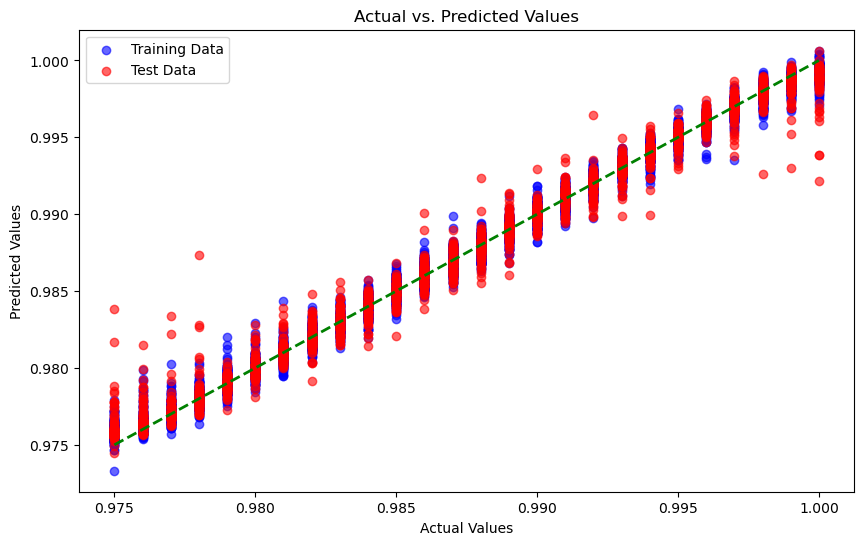

In [271]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(y_train, y_train_pred_xgb, color='blue', alpha=0.6, label='Training Data')

# Scatter plot for test data
plt.scatter(y_test, y_test_pred_xgb, color='red', alpha=0.6, label='Test Data')

# Add line of equality
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()

In [564]:
x_test

array([[-0.34496846, -0.3492534 , -0.53202804, ..., -0.58926106,
        -0.6278153 , -0.62591269],
       [ 0.42479796,  0.42810699,  0.15558576, ...,  0.09139021,
         0.07113784,  0.07893273],
       [-1.13728513, -1.12661379, -1.06991873, ..., -0.97820465,
        -1.04861362, -1.0232618 ],
       ...,
       [-1.5003825 , -1.51529398, -1.17714615, ..., -0.97820465,
        -0.67515413, -1.09514406],
       [ 0.79668611,  0.81678718,  0.57464768, ...,  0.57756969,
         0.43444769,  0.44433418],
       [ 0.42479796,  0.42810699,  0.155601  , ...,  0.09139021,
         0.08363874,  0.09091311]])

In [272]:
model_train_accuracy = r2_score(y_train, y_train_pred_xgb)
model_train_mse = mean_squared_error(y_train, y_train_pred_xgb )
model_train_mae = mean_absolute_error(y_train,y_train_pred_xgb)


    #test set
model_test_accuracy = r2_score(y_test, y_test_pred_xgb)
model_test_mse = mean_squared_error(y_test, y_test_pred_xgb)
model_test_mae = mean_absolute_error(y_test,y_test_pred_xgb)


In [273]:
print("model performance for training set")
print(f"Accuracy:{model_train_accuracy:.4f}")
print(f"mse:{model_train_mse:.4f}")
print(f"mae:{model_train_mae:.4f}")

print("-"*35)

print("model performance for test set")
print(f"Accuracy:{model_test_accuracy:.4f}")
print(f"mse:{model_test_mse:.4f}")
print(f"mae:{model_test_mae:.4f}")

model performance for training set
Accuracy:0.9943
mse:0.0000
mae:0.0004
-----------------------------------
model performance for test set
Accuracy:0.9847
mse:0.0000
mae:0.0006


In [571]:
# retraining with best parameters

In [575]:
xgb = XGBRegressor(n_estimators = 200, learning_rate = 0.1, colsample_bytree = 0.8,alpha=0,lambda_=1.0,max_depth= 14)

In [576]:
xgb.fit(x_train, y_train)

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda_=1.0, learning_rate=0.1,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=14, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None, ...)

In [577]:
y_train_pred_xgb = xgb.predict(x_train)
y_test_pred_xgb = xgb.predict(x_test)

In [578]:
model_train_accuracy = r2_score(y_train, y_train_pred_xgb)
model_train_mse = mean_squared_error(y_train, y_train_pred_xgb )
model_train_mae = mean_absolute_error(y_train,y_train_pred_xgb)


    #test set
model_test_accuracy = r2_score(y_test, y_test_pred_xgb)
model_test_mse = mean_squared_error(y_test, y_test_pred_xgb)
model_test_mae = mean_absolute_error(y_test,y_test_pred_xgb)

In [579]:
print("model performance for training set")
print(f"Accuracy:{model_train_accuracy:.4f}")
print(f"mse:{model_train_mse:.4f}")
print(f"mae:{model_train_mae:.4f}")

print("-"*35)

print("model performance for test set")
print(f"Accuracy:{model_test_accuracy:.4f}")
print(f"mse:{model_test_mse:.4f}")
print(f"mae:{model_test_mae:.4f}")

model performance for training set
Accuracy:0.9980
mse:0.0000
mae:0.0002
-----------------------------------
model performance for test set
Accuracy:0.9899
mse:0.0000
mae:0.0005


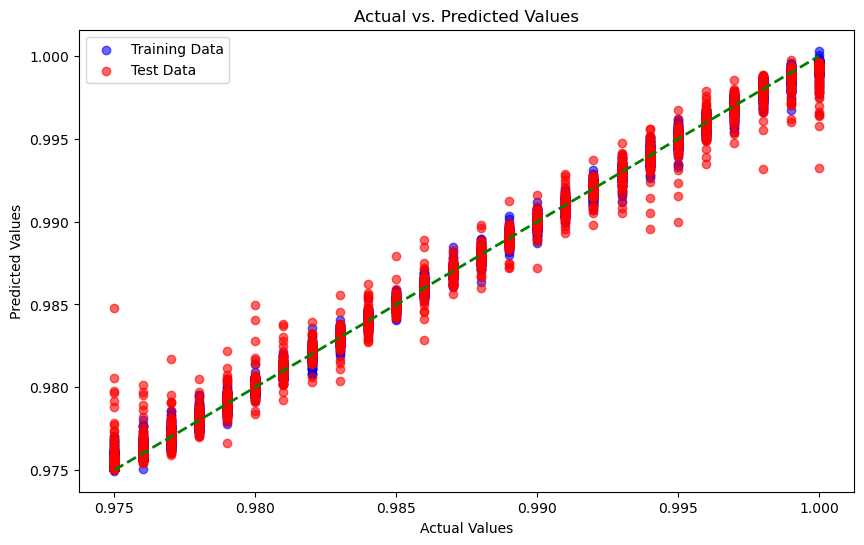

In [580]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(y_train, y_train_pred_xgb, color='blue', alpha=0.6, label='Training Data')

# Scatter plot for test data
plt.scatter(y_test, y_test_pred_xgb, color='red', alpha=0.6, label='Test Data')

# Add line of equality
min_val = min(min(y_train), min(y_test))
max_val = max(max(y_train), max(y_test))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()

In [519]:
model_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

In [520]:
model_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))

In [521]:
model_train_rmse

0.0005669962352083292

In [522]:
model_test_rmse

0.0008831322156234278

In [523]:
model_test_mse

7.799225102719444e-07

In [524]:
model_train_mse

3.21484730740419e-07

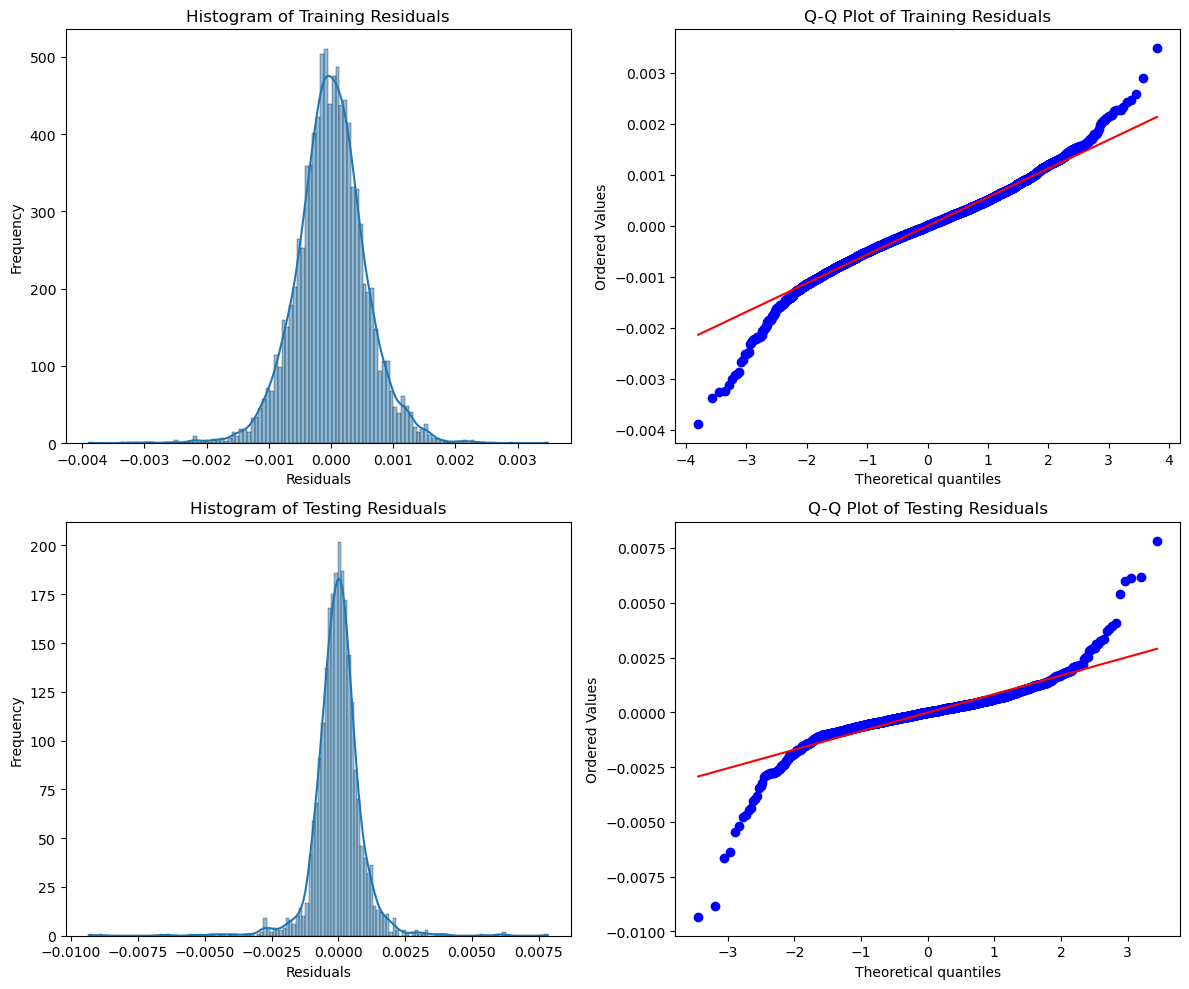

In [274]:
train_residuals = y_train - y_train_pred_xgb
test_residuals = y_test - y_test_pred_xgb

# Plot histogram and Q-Q plot for training residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for training residuals
sns.histplot(train_residuals, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Training Residuals')
axes[0, 0].set_xlabel('Residuals')
axes[0, 0].set_ylabel('Frequency')

# Q-Q plot for training residuals
stats.probplot(train_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Training Residuals')

# Histogram for testing residuals
sns.histplot(test_residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Testing Residuals')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')

# Q-Q plot for testing residuals
stats.probplot(test_residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Testing Residuals')

plt.tight_layout()
plt.show()

In [276]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=10)

In [277]:
print('training_accuracy for all 10 indivisual :', training_accuracy)
print()
print("training_accuracy with mean value :", training_accuracy.mean())
print()
print("training_accuracy max value :", training_accuracy.max())

training_accuracy for all 10 indivisual : [0.98395106 0.98554485 0.982138   0.98588545 0.98852005 0.98623275
 0.98456604 0.98351708 0.98251299 0.9830596 ]

training_accuracy with mean value : 0.984592787317716

training_accuracy max value : 0.9885200528998064


In [279]:
pd.DataFrame(index = x.columns, data=xgb.feature_importances_,
            columns=["Feature Importance"]).sort_values(by="Feature Importance", ascending=False)

Feature Importance
pexh            0.224756
p2              0.166594
gtt             0.115928
ggn             0.111302
v               0.088792
mf              0.084693
tic             0.081376
ts              0.044256
t2              0.034364
p48             0.024815
t48             0.023126

In [447]:
import pickle 
pickle.dump(xgb, open('Predictive_maintenance.pkl', 'wb'))

## PCA approach

In [281]:
from sklearn.decomposition import PCA

In [342]:
x = df_imputed.drop(['y_2'], axis=1)
y_2 = df_imputed['y_2']

In [374]:
def detect_outlier(col):
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    print("\n ****",col, '****')
    print(f"Q3:{Q3} | Q1:{Q1}")
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    print('Upper Limit',UL)
    print('Lower Limit',LL)
    df_imputed.loc[(df_imputed[col]>UL), col] = UL
    df_imputed.loc[(df_imputed[col]<LL), col] = LL
    return df_imputed

In [375]:
num_cols = [cols for cols in df_imputed.columns if df_imputed[cols].dtype != 'O']
for col in num_cols:
    detect_outlier(col)


 **** lp ****
Q3:7.148 | Q1:3.144
Upper Limit 13.154
Lower Limit -2.861999999999999

 **** v ****
Q3:21.0 | Q1:9.0
Upper Limit 39.0
Lower Limit -9.0

 **** gtt ****
Q3:38998.912 | Q1:8375.654
Upper Limit 84933.79899999998
Lower Limit -37559.232999999986

 **** gtn ****
Q3:2678.077 | Q1:1386.757
Upper Limit 4615.057000000001
Lower Limit -550.2230000000002

 **** ggn ****
Q3:9130.997 | Q1:7053.712
Upper Limit 12246.924499999997
Lower Limit 3937.784500000002

 **** ts ****
Q3:332.339 | Q1:60.315
Upper Limit 740.375
Lower Limit -347.721

 **** tp ****
Q3:332.339 | Q1:60.315
Upper Limit 740.375
Lower Limit -347.721

 **** t48 ****
Q3:831.406 | Q1:590.217
Upper Limit 1193.1895
Lower Limit 228.43350000000004

 **** t2 ****
Q3:692.88 | Q1:578.234
Upper Limit 864.8489999999999
Lower Limit 406.2650000000001

 **** p48 ****
Q3:2.979 | Q1:1.389
Upper Limit 5.364000000000001
Lower Limit -0.9960000000000002

 **** p2 ****
Q3:15.629 | Q1:7.441
Upper Limit 27.910999999999998
Lower Limit -4.8409999999

In [376]:
df_test = df_imputed.drop_duplicates()

In [377]:
df_test

lp     v        gtt       gtn       ggn       ts       tp       t48  \
0      5.140  15.0  21640.162  1924.358  8516.691  175.324  175.324   706.702   
1      9.300  27.0  72776.229  3560.412  9759.837  645.137  645.137  1060.156   
2      8.206  24.0  50994.673  3087.535  9313.854  438.110  438.110   927.728   
3      5.140  15.0  21626.805  1924.329  8472.097  175.221  175.221   695.477   
4      5.140  15.0  21636.430  1924.313  8494.777  175.306  175.306   731.494   
...      ...   ...        ...       ...       ...      ...      ...       ...   
12276  9.300  27.0  72774.292  3560.407  9753.571  644.796  644.796  1055.580   
12277  6.175  18.0  29796.511  2307.266  8840.516  246.316  246.316   780.537   
12278  5.140  15.0  21625.687  1924.321  8466.713  175.249  175.249   699.706   
12279  4.161  12.0  14718.853  1547.451  7728.002  113.727  113.727   631.711   
12280  2.088   6.0   3217.569  1350.216  6786.171   23.347   23.347   525.820   

            t2    p48      p2   pexh     tic     mf    y_2  
0      640.873  2.072  10.916  1.026  24.960  0.494  1.000  
1      774.302  4.511  22.426  1.051  87.741  1.737  0.997  
2      734.474  3.577  18.412  1.041  60.546  1.199  0.988  
3      633.124  2.086  11.074  1.027  24.549  0.486  0.991  
4      645.642  2.078  11.197  1.026  26.373  0.522  0.975  
...        ...    ...     ...    ...     ...    ...    ...  
12276  772.682  4.519  22.485  1.051  87.460  1.731  0.996  
12277  671.845  2.497  13.144  1.030  34.498  0.683  0.991  
12278  633.775  2.088  11.132  1.027  24.802  0.491  0.986  
12279  603.073  1.663   8.927  1.023  16.827  0.333  0.988  
12280  561.995  1.209   6.558  1.019  18.305  0.165  0.980  

[11945 rows x 15 columns]

In [378]:
x = df_test.drop(['y_2'], axis=1)
y_2 = df_test['y_2']

In [379]:
from sklearn.model_selection import train_test_split
x_train, x_test, y2_train, y2_test = train_test_split(x, y_2, test_size=0.2, random_state=42)

In [380]:
#trf = FunctionTransformer(func= np.log1p)
#xtrain_tr = trf.transform(x_train)
#xtest_tr = trf.transform(x_test)

In [381]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x_trainsc = scaler.fit_transform(x_train)
x_testsc = scaler.transform(x_test)

In [382]:
pca = PCA(n_components=None)
x_train_n = pca.fit_transform(x_trainsc)
x_test_n = pca.fit_transform(x_testsc)

In [383]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.75478381e-01, 1.80114568e-02, 2.61537421e-03, 1.54017858e-03,
       1.38739938e-03, 7.10165645e-04, 1.63542279e-04, 5.07799459e-05,
       2.18408508e-05, 1.20725915e-05, 6.70402808e-06, 1.27039493e-06,
       8.34215555e-07, 6.27165676e-36])

In [349]:
9.75527661e-01 + 1.89456920e-02 #+2.35693441e-03 + 1.59512278e-03

0.994473353

In [313]:
print(pd.DataFrame(x_trainsc).head())
print('***************'*5)
print(pd.DataFrame(x_train_n).head())

         0      1         2         3         4         5         6   \
0  0.370375  0.375  0.199439  0.106423  0.357653  0.169430  0.169430   
1  0.245773  0.250  0.111990  0.035093  0.146571  0.085975  0.085975   
2  0.370375  0.375  0.199519  0.106432  0.381753  0.169529  0.169529   
3  0.865964  0.875  0.699621  0.790006  0.851648  0.676347  0.676347   
4  0.370375  0.375  0.199423  0.106419  0.347037  0.169435  0.169435   

         7         8         9         10        11        12        13  
0  0.263469  0.239898  0.164214  0.173835  0.121212  0.175710  0.143991  
1  0.215289  0.159689  0.086291  0.099202  0.030303  0.133714  0.100340  
2  0.289727  0.272103  0.162193  0.172910  0.090909  0.183629  0.151927  
3  0.731474  0.795288  0.713997  0.723783  0.666667  0.658337  0.645125  
4  0.294065  0.257275  0.165368  0.185050  0.121212  0.186449  0.155329  
***************************************************************************
         0         1         2         3       

In [404]:
x_train.shape

(9556, 14)

In [405]:
pca2 = PCA(n_components=7)
x_train_2 = pca2.fit_transform(x_trainsc)
x_test_2 = pca2.fit_transform(x_testsc)

In [406]:
x_train_2

array([[ 4.20570258e+00, -7.42013513e-02, -1.02640296e-02, ...,
         3.77904213e-02,  2.01319072e-01, -6.49489685e-02],
       [ 4.08952918e+00, -1.04001609e-01, -1.96696417e-01, ...,
         3.80601907e-02,  1.51875323e-01,  2.30933416e-02],
       [ 7.11156582e+00,  7.90784613e-01, -4.27918796e-02, ...,
        -8.73727302e-02, -1.06685998e-01,  6.03322647e-02],
       ...,
       [ 2.23828402e+00, -4.51432871e-01, -1.49042602e-01, ...,
         9.74724351e-02,  3.03373879e-02,  5.99055381e-02],
       [ 4.10906339e+00, -1.03518851e-01, -1.71408862e-01, ...,
         3.87678409e-02,  1.58710696e-01,  8.32494389e-03],
       [ 4.08501066e+00, -1.16101877e-01, -1.91976342e-01, ...,
         3.79956682e-02,  1.50224555e-01,  6.37232059e-03]])

In [407]:
models = {
    "Random Forest":RandomForestRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Gradient Boosting":GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Support Vector Regressorr":SVR(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_2, y2_train)


    y2_train_pred = model.predict(x_train_2)
    y2_test_pred = model.predict(x_test_2)

    #training set
    model_train_accuracy = r2_score(y2_train, y2_train_pred)
    model_train_mse = mean_squared_error(y2_train, y2_train_pred)
    model_train_mae = mean_absolute_error(y2_train,y2_train_pred)


    #test set
    model_test_accuracy = r2_score(y2_test, y2_test_pred)
    model_test_mse = mean_squared_error(y2_test, y2_test_pred)
    model_test_mae = mean_absolute_error(y2_test,y2_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:0.9980
mse:0.0000
mae:0.0002
-----------------------------------
model performance for test set
Accuracy:0.9103
mse:0.0000
mae:0.0016


Decision Tree
model performance for training set
Accuracy:1.0000
mse:0.0000
mae:0.0000
-----------------------------------
model performance for test set
Accuracy:0.8016
mse:0.0000
mae:0.0023


Gradient Boosting
model performance for training set
Accuracy:0.8081
mse:0.0000
mae:0.0024
-----------------------------------
model performance for test set
Accuracy:0.7256
mse:0.0000
mae:0.0029


AdaBoost Regressor
model performance for training set
Accuracy:0.3060
mse:0.0000
mae:0.0052
-----------------------------------
model performance for test set
Accuracy:0.2712
mse:0.0000
mae:0.0052


K-Neighbors Regressor
model performance for training set
Accuracy:0.9741
mse:0.0000
mae:0.0005
-----------------------------------
model performance for test set
Accuracy:0.9261
mse:0.0000
mae:0.0014


Support Vecto

In [409]:
knn_params = {"n_neighbors":[2,3,10,20,40,50],
             'metric':['minkowski','manhattan']}
rf_params = {'max_depth': [1,2,5,4,6,7],
              'max_features': ['log2', 'sqrt'],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
             'n_estimators':[100,200,400,500,600]}
xgboost_params = {"learning_rate": [0.1,0.01],
                  'n_estimators':[100,200,300,500],
                  "colsample_bytree":[0.5,0.8,1,0.3,0.4],
                  "alpha": [0, 0.1, 1.0, 10.0],
                  "lambda": [0, 0.1, 1.0, 10.0]}
cat_params = {"learning_rate": [0.1,0.01],
             'max_depth': [1,2,5,4,6,7]}

In [410]:
randomcv_models = [('KNN',KNeighborsRegressor(), knn_params),
                  ('RF',RandomForestRegressor(), rf_params),
                  ('XGBoost',XGBRegressor() , xgboost_params),
                  ('CatBoost',CatBoostRegressor(verbose=False), cat_params)]

In [411]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1,scoring='r2')
    random.fit(x_train_2,y2_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} ------------")
    print(model_param[model_name])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
---------------- Best Params for KNN ------------
{'n_neighbors': 2, 'metric': 'manhattan'}
---------------- Best Params for RF ------------
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'absolute_error'}
---------------- Best Params for XGBoost ------------
{'n_estimators': 300, 'learning_rate': 0.1, 'lambda': 0, 'colsample_bytree': 1, 'alpha': 0}
---------------- Best Params for CatBoost ------------
{'max_depth': 7, 'learning_rate': 0.1}


In [412]:
models = {
    "Random Forest Regressor":RandomForestRegressor(n_estimators = 100, max_features = 'log2', max_depth = 7, criterion = 'absolute_error'),
    "XGBRegressor":XGBRegressor( n_estimators = 200, learning_rate = 0.1, colsample_bytree = 1),
    "K-Neighbors Regressor":KNeighborsRegressor( n_neighbors = 2, metric = 'manhattan'),
    "CatBoosting Regressor":CatBoostRegressor(max_depth = 7, learning_rate = 0.1, verbose= False)
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_2, y2_train)


    y2_train_pred = model.predict(x_train_2)
    y2_test_pred = model.predict(x_test_2)

    #training set
    model_train_accuracy = r2_score(y2_train, y2_train_pred)
    model_train_mse = mean_squared_error(y2_train, y2_train_pred)
    model_train_mae = mean_absolute_error(y2_train,y2_train_pred)


    #test set
    model_test_accuracy = r2_score(y2_test, y2_test_pred)
    model_test_mse = mean_squared_error(y2_test, y2_test_pred)
    model_test_mae = mean_absolute_error(y2_test,y2_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Random Forest Regressor
model performance for training set
Accuracy:0.7470
mse:0.0000
mae:0.0029
-----------------------------------
model performance for test set
Accuracy:0.6843
mse:0.0000
mae:0.0032


XGBRegressor
model performance for training set
Accuracy:0.9933
mse:0.0000
mae:0.0005
-----------------------------------
model performance for test set
Accuracy:0.9236
mse:0.0000
mae:0.0015


K-Neighbors Regressor
model performance for training set
Accuracy:0.9893
mse:0.0000
mae:0.0004
-----------------------------------
model performance for test set
Accuracy:0.9178
mse:0.0000
mae:0.0015


CatBoosting Regressor
model performance for training set
Accuracy:0.9977
mse:0.0000
mae:0.0003
-----------------------------------
model performance for test set
Accuracy:0.9445
mse:0.0000
mae:0.0013




In [413]:
xgb_pca = XGBRegressor(n_estimators = 200, learning_rate = 0.1, colsample_bytree = 1)

In [414]:
xgb_pca.fit(x_train_2, y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [415]:
y_train_pred_xgb_pca = xgb_pca.predict(x_train_2)
y_test_pred_xgb_pca = xgb_pca.predict(x_test_2)

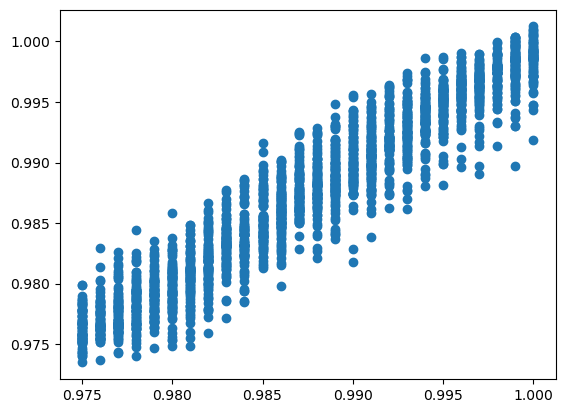

In [416]:
plt.scatter(y2_test, y_test_pred_xgb_pca)
plt.show()

In [533]:
mean_squared_error(y2_train, y2_train_pred)

1.3266507980553283e-07

In [534]:
mean_squared_error(y2_test, y2_test_pred)

2.9824599748076083e-06

In [417]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb_pca, x_train_2, y2_train, cv=10)

In [418]:
print('training_accuracy for all 10 indivisual :', training_accuracy)
print()
print("training_accuracy with mean value :", training_accuracy.mean())
print()
print("training_accuracy max value :", training_accuracy.max())

training_accuracy for all 10 indivisual : [0.97961423 0.98371483 0.98366469 0.98197502 0.98096795 0.98519407
 0.98069697 0.97842918 0.97806564 0.98373818]

training_accuracy with mean value : 0.9816060753532124

training_accuracy max value : 0.9851940678989561


In [420]:
x_train_2df = pd.DataFrame(x_train_2)

0         1         2         3         4         5         6
0     4.205703 -0.074201 -0.010264  0.070737  0.037790  0.201319 -0.064949
1     4.089529 -0.104002 -0.196696 -0.077565  0.038060  0.151875  0.023093
2     7.111566  0.790785 -0.042792 -0.087382 -0.087373 -0.106686  0.060332
3    -3.223670  0.047824  0.086142 -0.072109 -0.190482  0.072546 -0.029383
4    -3.987746  0.267118 -0.364208  0.113781 -0.170464  0.028041  0.001007
...        ...       ...       ...       ...       ...       ...       ...
9551  2.188874 -0.488066 -0.185049 -0.072165  0.098363  0.009454  0.037211
9552 -3.254282  0.072633  0.061709 -0.103414 -0.209112  0.088293 -0.016324
9553  2.238284 -0.451433 -0.149043 -0.044428  0.097472  0.030337  0.059906
9554  4.109063 -0.103519 -0.171409 -0.053098  0.038768  0.158711  0.008325
9555  4.085011 -0.116102 -0.191976 -0.069625  0.037996  0.150225  0.006372

[9556 rows x 7 columns]

In [421]:
feature_importances = pd.DataFrame(
    data=xgb_pca.feature_importances_,
    index=x_train_2df.columns,
    columns=["Feature Importance"]
)

print(feature_importances)

   Feature Importance
0            0.107933
1            0.263635
2            0.099174
3            0.185076
4            0.138528
5            0.115020
6            0.090634


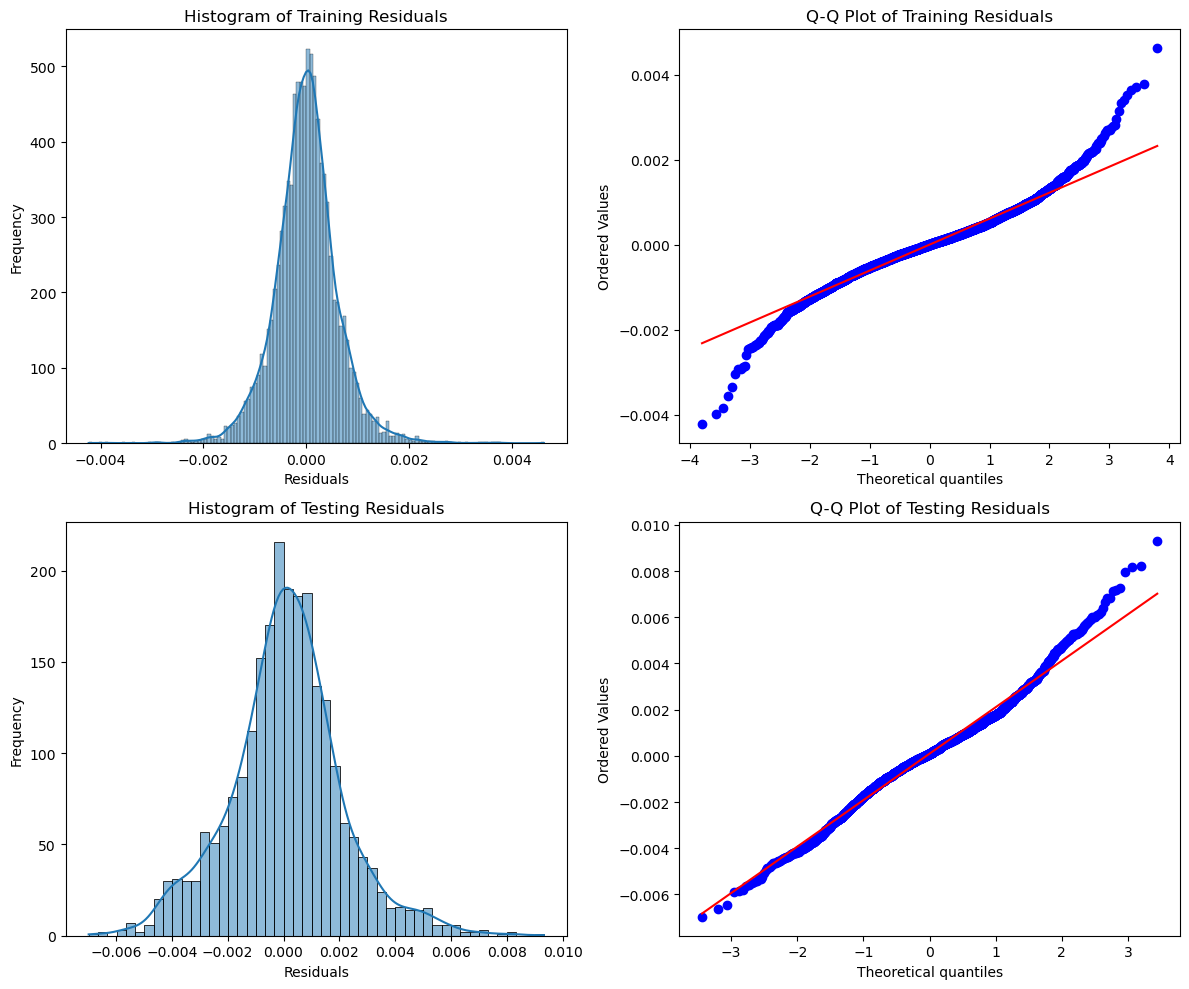

In [450]:
train_residuals = y2_train -y_train_pred_xgb_pca
test_residuals = y2_test - y_test_pred_xgb_pca

# Plot histogram and Q-Q plot for training residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for training residuals
sns.histplot(train_residuals, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Training Residuals')
axes[0, 0].set_xlabel('Residuals')
axes[0, 0].set_ylabel('Frequency')

# Q-Q plot for training residuals
stats.probplot(train_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Training Residuals')

# Histogram for testing residuals
sns.histplot(test_residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Testing Residuals')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')

# Q-Q plot for testing residuals
stats.probplot(test_residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Testing Residuals')

plt.tight_layout()
plt.show()

In [446]:
import pickle 
pickle.dump(xgb_pca, open('Predictive_maintenancey_pca.pkl', 'wb'))

# without removing outliers and nan values

In [275]:
df2 = df.copy()

In [781]:
x = df_imputed.drop(['y_1','y_2'], axis=1)
y_1 = df_imputed['y_1']
y_2 = df_imputed['y_2']

In [782]:
from sklearn.model_selection import train_test_split
x_train, x_test, y1_train, y1_test = train_test_split(x, y_1, test_size=0.2, random_state=42)

In [783]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [784]:
pca = PCA(n_components=None)
x_train_n = pca.fit_transform(x_train )
x_test_n = pca.fit_transform(x_test)

In [785]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.75867357e-01, 1.82190180e-02, 2.13244291e-03, 1.46104961e-03,
       1.37337169e-03, 6.83312971e-04, 1.67282312e-04, 5.01711158e-05,
       2.41220221e-05, 1.14261648e-05, 8.12478050e-06, 1.44222325e-06,
       8.78980859e-07, 8.78846508e-36])

In [786]:
pca2 = PCA(n_components=6)
x_train_2 = pca2.fit_transform(x_train)
x_test_2 = pca2.fit_transform(x_test)

In [787]:
models = {
    "Random Forest":RandomForestRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Gradient Boosting":GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Support Vector Regressorr":SVR(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_2, y1_train)


    y1_train_pred = model.predict(x_train_2)
    y1_test_pred = model.predict(x_test_2)

    #training set
    model_train_accuracy = r2_score(y1_train, y1_train_pred)
    model_train_mse = mean_squared_error(y1_train, y1_train_pred)
    model_train_mae = mean_absolute_error(y1_train,y1_train_pred)


    #test set
    model_test_accuracy = r2_score(y1_test, y1_test_pred)
    model_test_mse = mean_squared_error(y1_test, y1_test_pred)
    model_test_mae = mean_absolute_error(y1_test,y1_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:0.9979
mse:0.0000
mae:0.0003
-----------------------------------
model performance for test set
Accuracy:0.5650
mse:0.0001
mae:0.0066


Decision Tree
model performance for training set
Accuracy:1.0000
mse:0.0000
mae:0.0000
-----------------------------------
model performance for test set
Accuracy:0.4102
mse:0.0001
mae:0.0078


Gradient Boosting
model performance for training set
Accuracy:0.8767
mse:0.0000
mae:0.0041
-----------------------------------
model performance for test set
Accuracy:0.6311
mse:0.0001
mae:0.0066


AdaBoost Regressor
model performance for training set
Accuracy:0.5277
mse:0.0001
mae:0.0089
-----------------------------------
model performance for test set
Accuracy:0.3931
mse:0.0001
mae:0.0099


K-Neighbors Regressor
model performance for training set
Accuracy:0.9875
mse:0.0000
mae:0.0007
-----------------------------------
model performance for test set
Accuracy:0.3343
mse:0.0002
mae:0.0096


Support Vecto

In [276]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed2 = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

In [791]:
x = df_imputed.drop(['y_1','y_2'], axis=1)
y_1 = df_imputed['y_1']
y_2 = df_imputed['y_2']

In [792]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y1_train2, y1_test2 = train_test_split(x, y_1, test_size=0.2, random_state=42)

In [793]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

In [796]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train2 , y1_train2)
y1_pred_test_linear = linear.predict(x_test2 )
y1_pred_train_linear = linear.predict(x_train2 )
from sklearn import metrics
print(metrics.mean_squared_error(y1_train, y1_pred_train_linear))
print(metrics.mean_squared_error(y1_test, y1_pred_test_linear))

3.895953527458415e-05
3.821565054291899e-05


In [795]:
from sklearn.metrics import r2_score
print("Accuracy :", r2_score(y1_test2, y1_pred_test_linear))

Accuracy : 0.832472411203036


In [797]:
models = {
    "Random Forest":RandomForestRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Gradient Boosting":GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Support Vector Regressorr":SVR(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train2, y1_train2)


    y1_train_pred = model.predict(x_train2)
    y1_test_pred = model.predict(x_test2)

    #training set
    model_train_accuracy = r2_score(y1_train2, y1_train_pred)
    model_train_mse = mean_squared_error(y1_train2, y1_train_pred)
    model_train_mae = mean_absolute_error(y1_train2,y1_train_pred)


    #test set
    model_test_accuracy = r2_score(y1_test2, y1_test_pred)
    model_test_mse = mean_squared_error(y1_test2, y1_test_pred)
    model_test_mae = mean_absolute_error(y1_test2,y1_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:0.9995
mse:0.0000
mae:0.0002
-----------------------------------
model performance for test set
Accuracy:0.9957
mse:0.0000
mae:0.0005


Decision Tree
model performance for training set
Accuracy:1.0000
mse:0.0000
mae:0.0000
-----------------------------------
model performance for test set
Accuracy:0.9863
mse:0.0000
mae:0.0010


Gradient Boosting
model performance for training set
Accuracy:0.9440
mse:0.0000
mae:0.0026
-----------------------------------
model performance for test set
Accuracy:0.9344
mse:0.0000
mae:0.0027


AdaBoost Regressor
model performance for training set
Accuracy:0.1966
mse:0.0002
mae:0.0116
-----------------------------------
model performance for test set
Accuracy:0.1767
mse:0.0002
mae:0.0117


K-Neighbors Regressor
model performance for training set
Accuracy:0.9918
mse:0.0000
mae:0.0006
-----------------------------------
model performance for test set
Accuracy:0.9826
mse:0.0000
mae:0.0008


Support Vecto

In [427]:
# Method 1: Using `isin` and `any`
value_to_find = '115.797'
result = df.isin([value_to_find])

# Check if the value exists in the DataFrame
if result.any().any():
    print(f"Value {value_to_find} found in the DataFrame")
    # Get the locations where the value is found
    locations = df.where(result).stack().index.tolist()
    print("Locations:", locations)
else:
    print(f"Value {value_to_find} not found in the DataFrame")

# Method 2: Using `loc`
locations = []
for column in df.columns:
    rows = df.loc[df[column] == value_to_find].index.tolist()
    for row in rows:
        locations.append((row, column))

if locations:
    print(f"Value {value_to_find} found in the DataFrame at locations:")
    for loc in locations:
        print(f"Row: {loc[0]}, Column: {loc[1]}")
else:
    print(f"Value {value_to_find} not found in the DataFrame")


Value 115.797 not found in the DataFrame
Value 115.797 not found in the DataFrame


In [117]:
import pickle 
pickle.dump(xgb, open('Predictive_maintenance.pkl', 'wb'))

In [149]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y_2, test_size=0.2, random_state=42)

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

In [151]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x2_train, y2_train)
y2_pred_test_linear = linear.predict(x2_test)
y2_pred_train_linear = linear.predict(x2_train)
from sklearn import metrics
print(metrics.mean_squared_error(y2_train, y2_pred_train_linear))
print(metrics.mean_squared_error(y2_test, y2_pred_test_linear))

5.366391021652315e-06
5.324562365603279e-06


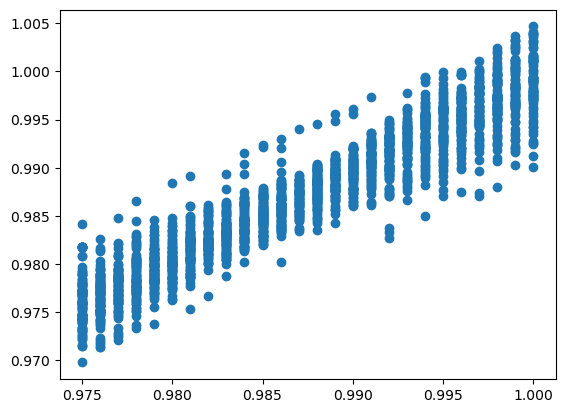

In [152]:
plt.scatter(y2_test, y2_pred_test_linear)
plt.show()

In [153]:
from sklearn.metrics import r2_score
print("Accuracy :", r2_score(y2_test, y2_pred_test_linear))

Accuracy : 0.9096684340421612


In [154]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(x2_train, y2_train)
print("Ridge Model :", ridge.coef_)

Ridge Model : [ 0.01009047  0.04117323  0.30250998  0.05062695  0.03476748 -0.16026853
 -0.16026853 -0.11655545  0.00781147  0.10202468 -0.29160458  0.0062987
 -0.0064273   0.18396738]


In [155]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(x2_train, y2_train)
y2_pred_ridge_train = ridge.predict(x2_train)
y2_pred_ridge_test = ridge.predict(x2_test)
print("Ridge Model :", ridge.coef_)
print("Ridge_Train_ACC :", r2_score(y2_train, y2_pred_ridge_train))
print()
print("Ridge_Test_ACC :", r2_score(y2_test, y2_pred_ridge_test))

Ridge Model : [ 0.01009047  0.04117323  0.30250998  0.05062695  0.03476748 -0.16026853
 -0.16026853 -0.11655545  0.00781147  0.10202468 -0.29160458  0.0062987
 -0.0064273   0.18396738]
Ridge_Train_ACC : 0.9109838416055819

Ridge_Test_ACC : 0.909679881838528


In [156]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [157]:
reg_model = smf.OLS(endog = y2_train, exog=x2_train).fit()

In [158]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    y_2   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.04308
Date:                Wed, 24 Jul 2024   Prob (F-statistic):                        1.00
Time:                        17:19:56   Log-Likelihood:                         -13984.
No. Observations:                9947   AIC:                                  2.799e+04
Df Residuals:                    9934   BIC:                                  2.809e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0099      2.026      0.005      0.996      -3.962       3.982
x2             0.0415      1.870      0.022      0.982      -3.624       3.707
x3             0.3031      1.330      0.228      0.820      -2.304       2.910
x4             0.0507      0.393      0.129      0.897      -0.720       0.822
x5             0.0348      0.160      0.218      0.828      -0.279       0.349
x6            -0.1606      0.523     -0.307      0.759      -1.185       0.864
x7            -0.1606      0.523     -0.307      0.759      -1.185       0.864
x8            -0.1168      0.572     -0.204      0.838      -1.238       1.004
x9             0.0079      0.382      0.021      0.984      -0.741       0.756
x10            0.1016      1.755      0.058      0.954      -3.338       3.542
x11           -0.2916      0.766     -0.381      0.704      -1.793       1.210
x12            0.0063      0.352      0.018      0.986      -0.683       0.696
x13           -0.0064      0.079     -0.081      0.935      -0.161       0.149
x14            0.1844      1.024      0.180      0.857      -1.822       2.191
==============================================================================
Omnibus:                      373.312   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1043.200
Skew:                           0.123   Prob(JB):                    2.96e-227
Kurtosis:                       4.567   Cond. No.                     3.62e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.03e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [160]:
models = {
    'Linear Regression':LinearRegression(),
    "Random Forest":RandomForestRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Gradient Boosting":GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Support Vector Regressorr":SVR(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x2_train, y2_train)


    y2_train_pred = model.predict(x2_train)
    y2_test_pred = model.predict(x2_test)

    #training set
    model_train_accuracy = r2_score(y2_train, y2_train_pred)
    model_train_mse = mean_squared_error(y2_train, y2_train_pred)
    model_train_mae = mean_absolute_error(y2_train,y2_train_pred)


    #test set
    model_test_accuracy = r2_score(y2_test, y2_test_pred)
    model_test_mse = mean_squared_error(y2_test, y2_test_pred)
    model_test_mae = mean_absolute_error(y2_test,y2_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Linear Regression
model performance for training set
Accuracy:0.9110
mse:0.0000
mae:0.0017
-----------------------------------
model performance for test set
Accuracy:0.9097
mse:0.0000
mae:0.0017


Random Forest
model performance for training set
Accuracy:0.9988
mse:0.0000
mae:0.0001
-----------------------------------
model performance for test set
Accuracy:0.9904
mse:0.0000
mae:0.0003


Decision Tree
model performance for training set
Accuracy:1.0000
mse:0.0000
mae:0.0000
-----------------------------------
model performance for test set
Accuracy:0.9721
mse:0.0000
mae:0.0005


Gradient Boosting
model performance for training set
Accuracy:0.8547
mse:0.0000
mae:0.0022
-----------------------------------
model performance for test set
Accuracy:0.8438
mse:0.0000
mae:0.0022


AdaBoost Regressor
model performance for training set
Accuracy:0.1594
mse:0.0001
mae:0.0059
-----------------------------------
model performance for test set
Accuracy:0.1751
mse:0.0000
mae:0.0058


K-Neighbors Regre

166:	learn: 0.0024428	total: 565ms	remaining: 2.82s
167:	learn: 0.0024322	total: 568ms	remaining: 2.81s
168:	learn: 0.0024222	total: 571ms	remaining: 2.81s
169:	learn: 0.0024084	total: 573ms	remaining: 2.8s
170:	learn: 0.0023931	total: 576ms	remaining: 2.79s
171:	learn: 0.0023841	total: 579ms	remaining: 2.79s
172:	learn: 0.0023791	total: 582ms	remaining: 2.78s
173:	learn: 0.0023663	total: 584ms	remaining: 2.77s
174:	learn: 0.0023553	total: 587ms	remaining: 2.77s
175:	learn: 0.0023430	total: 589ms	remaining: 2.76s
176:	learn: 0.0023327	total: 592ms	remaining: 2.75s
177:	learn: 0.0023229	total: 594ms	remaining: 2.74s
178:	learn: 0.0023174	total: 597ms	remaining: 2.74s
179:	learn: 0.0023085	total: 599ms	remaining: 2.73s
180:	learn: 0.0023020	total: 601ms	remaining: 2.72s
181:	learn: 0.0022949	total: 604ms	remaining: 2.71s
182:	learn: 0.0022861	total: 606ms	remaining: 2.71s
183:	learn: 0.0022772	total: 609ms	remaining: 2.7s
184:	learn: 0.0022706	total: 611ms	remaining: 2.69s
185:	learn: 0.

328:	learn: 0.0014044	total: 966ms	remaining: 1.97s
329:	learn: 0.0014002	total: 969ms	remaining: 1.97s
330:	learn: 0.0013971	total: 971ms	remaining: 1.96s
331:	learn: 0.0013929	total: 974ms	remaining: 1.96s
332:	learn: 0.0013872	total: 977ms	remaining: 1.96s
333:	learn: 0.0013835	total: 979ms	remaining: 1.95s
334:	learn: 0.0013777	total: 982ms	remaining: 1.95s
335:	learn: 0.0013745	total: 985ms	remaining: 1.95s
336:	learn: 0.0013701	total: 987ms	remaining: 1.94s
337:	learn: 0.0013665	total: 989ms	remaining: 1.94s
338:	learn: 0.0013651	total: 992ms	remaining: 1.93s
339:	learn: 0.0013614	total: 994ms	remaining: 1.93s
340:	learn: 0.0013573	total: 997ms	remaining: 1.93s
341:	learn: 0.0013541	total: 1000ms	remaining: 1.92s
342:	learn: 0.0013504	total: 1s	remaining: 1.92s
343:	learn: 0.0013449	total: 1s	remaining: 1.92s
344:	learn: 0.0013391	total: 1.01s	remaining: 1.91s
345:	learn: 0.0013343	total: 1.01s	remaining: 1.91s
346:	learn: 0.0013317	total: 1.01s	remaining: 1.9s
347:	learn: 0.0013

488:	learn: 0.0010024	total: 1.36s	remaining: 1.43s
489:	learn: 0.0010000	total: 1.37s	remaining: 1.42s
490:	learn: 0.0009978	total: 1.37s	remaining: 1.42s
491:	learn: 0.0009961	total: 1.37s	remaining: 1.42s
492:	learn: 0.0009935	total: 1.38s	remaining: 1.42s
493:	learn: 0.0009928	total: 1.39s	remaining: 1.42s
494:	learn: 0.0009901	total: 1.39s	remaining: 1.42s
495:	learn: 0.0009886	total: 1.39s	remaining: 1.41s
496:	learn: 0.0009864	total: 1.4s	remaining: 1.41s
497:	learn: 0.0009851	total: 1.4s	remaining: 1.41s
498:	learn: 0.0009836	total: 1.4s	remaining: 1.41s
499:	learn: 0.0009811	total: 1.4s	remaining: 1.4s
500:	learn: 0.0009785	total: 1.41s	remaining: 1.4s
501:	learn: 0.0009764	total: 1.41s	remaining: 1.4s
502:	learn: 0.0009745	total: 1.41s	remaining: 1.39s
503:	learn: 0.0009738	total: 1.41s	remaining: 1.39s
504:	learn: 0.0009714	total: 1.42s	remaining: 1.39s
505:	learn: 0.0009707	total: 1.42s	remaining: 1.38s
506:	learn: 0.0009700	total: 1.42s	remaining: 1.38s
507:	learn: 0.00096

705:	learn: 0.0007493	total: 1.96s	remaining: 817ms
706:	learn: 0.0007480	total: 1.96s	remaining: 814ms
707:	learn: 0.0007473	total: 1.97s	remaining: 811ms
708:	learn: 0.0007460	total: 1.97s	remaining: 808ms
709:	learn: 0.0007450	total: 1.97s	remaining: 806ms
710:	learn: 0.0007447	total: 1.98s	remaining: 803ms
711:	learn: 0.0007439	total: 1.98s	remaining: 800ms
712:	learn: 0.0007434	total: 1.98s	remaining: 798ms
713:	learn: 0.0007426	total: 1.98s	remaining: 795ms
714:	learn: 0.0007421	total: 1.99s	remaining: 792ms
715:	learn: 0.0007406	total: 1.99s	remaining: 790ms
716:	learn: 0.0007397	total: 1.99s	remaining: 787ms
717:	learn: 0.0007391	total: 2s	remaining: 784ms
718:	learn: 0.0007388	total: 2s	remaining: 781ms
719:	learn: 0.0007383	total: 2s	remaining: 779ms
720:	learn: 0.0007380	total: 2s	remaining: 776ms
721:	learn: 0.0007371	total: 2.01s	remaining: 773ms
722:	learn: 0.0007365	total: 2.01s	remaining: 770ms
723:	learn: 0.0007363	total: 2.01s	remaining: 768ms
724:	learn: 0.0007356	to

916:	learn: 0.0006187	total: 2.56s	remaining: 232ms
917:	learn: 0.0006183	total: 2.56s	remaining: 229ms
918:	learn: 0.0006181	total: 2.56s	remaining: 226ms
919:	learn: 0.0006180	total: 2.57s	remaining: 223ms
920:	learn: 0.0006175	total: 2.57s	remaining: 220ms
921:	learn: 0.0006171	total: 2.57s	remaining: 218ms
922:	learn: 0.0006170	total: 2.57s	remaining: 215ms
923:	learn: 0.0006165	total: 2.58s	remaining: 212ms
924:	learn: 0.0006161	total: 2.58s	remaining: 209ms
925:	learn: 0.0006155	total: 2.58s	remaining: 206ms
926:	learn: 0.0006148	total: 2.58s	remaining: 204ms
927:	learn: 0.0006143	total: 2.59s	remaining: 201ms
928:	learn: 0.0006140	total: 2.59s	remaining: 198ms
929:	learn: 0.0006138	total: 2.59s	remaining: 195ms
930:	learn: 0.0006135	total: 2.59s	remaining: 192ms
931:	learn: 0.0006129	total: 2.6s	remaining: 189ms
932:	learn: 0.0006119	total: 2.6s	remaining: 187ms
933:	learn: 0.0006118	total: 2.6s	remaining: 184ms
934:	learn: 0.0006109	total: 2.6s	remaining: 181ms
935:	learn: 0.00

In [621]:
knn_params = {"n_neighbors":[2,3,10,20,40,50],
             'metric':['minkowski','manhattan']}
rf_params = {'max_depth': [5, 14, 4,6,8],
              'max_features': ['log2', 'sqrt'],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
             'n_estimators':[100,200,400,500,600,800]}
xgboost_params = {"learning_rate": [0.1,0.01],
                  'n_estimators':[100,200,300,400,500],
                  "colsample_bytree":[0.5,0.8,1,0.3,0.4]}
cat_params = {"learning_rate": [0.1,0.01],
             'max_depth': [5, 15, 4,6,8]}

In [622]:
randomcv_models = [('KNN',KNeighborsRegressor(), knn_params),
                  ('RF',RandomForestRegressor(), rf_params),
                  ('XGBoost',XGBRegressor() , xgboost_params),
                  ('CatBoost',CatBoostRegressor(verbose=False), cat_params)]

In [623]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1)
    random.fit(x2_train,y2_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} ------------")
    print(model_param[model_name])

NameError: name 'x2_train' is not defined

In [165]:
models = {
    "Random Forest Regressor":RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', max_depth = 14, criterion = 'absolute_error'),
    "K-Neighbors Regressor":KNeighborsRegressor( n_neighbors = 2, metric = 'manhattan'),
    "XGBRegressor":XGBRegressor( n_estimators = 200, learning_rate = 0.1, colsample_bytree = 0.8),
    "CatBoosting Regressor":CatBoostRegressor(max_depth = 15, learning_rate = 0.1, verbose= False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x2_train, y2_train)


    y2_train_pred = model.predict(x2_train)
    y2_test_pred = model.predict(x2_test)

    #training set
    model_train_accuracy = r2_score(y2_train, y2_train_pred)
    model_train_mse = mean_squared_error(y2_train, y2_train_pred )
    model_train_mae = mean_absolute_error(y2_train,y2_train_pred)


    #test set
    model_test_accuracy = r2_score(y2_test, y2_test_pred)
    model_test_mse = mean_squared_error(y2_test, y2_test_pred)
    model_test_mae = mean_absolute_error(y2_test,y2_test_pred)

    print(list(models.keys())[i])

    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"mse:{model_train_mse:.4f}")
    print(f"mae:{model_train_mae:.4f}")

    print("-"*35)

    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"mse:{model_test_mse:.4f}")
    print(f"mae:{model_test_mae:.4f}")

    print("="*35)
    print('\n')

Random Forest Regressor
model performance for training set
Accuracy:0.9307
mse:0.0000
mae:0.0010
-----------------------------------
model performance for test set
Accuracy:0.9155
mse:0.0000
mae:0.0012


K-Neighbors Regressor
model performance for training set
Accuracy:0.9933
mse:0.0000
mae:0.0003
-----------------------------------
model performance for test set
Accuracy:0.9738
mse:0.0000
mae:0.0006


XGBRegressor
model performance for training set
Accuracy:0.9945
mse:0.0000
mae:0.0004
-----------------------------------
model performance for test set
Accuracy:0.9861
mse:0.0000
mae:0.0006


CatBoosting Regressor
model performance for training set
Accuracy:0.9991
mse:0.0000
mae:0.0002
-----------------------------------
model performance for test set
Accuracy:0.9941
mse:0.0000
mae:0.0004




In [168]:
xgb_y2  = XGBRegressor( n_estimators = 200, learning_rate = 0.1, colsample_bytree = 0.8)

In [169]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb_y2, x2_train, y2_train, cv=10)

In [170]:
print('training_accuracy for all 10 indivisual :', training_accuracy)
print()
print("training_accuracy with mean value :", training_accuracy.mean())
print()
print("training_accuracy max value :", training_accuracy.max())

training_accuracy for all 10 indivisual : [0.98886948 0.98509385 0.98788102 0.98985353 0.98889653 0.98607408
 0.98482822 0.98572076 0.98580803 0.98726608]

training_accuracy with mean value : 0.9870291590579366

training_accuracy max value : 0.9898535324561556


In [171]:
y2_train_pred_xgb = model.predict(x2_train)
y2_test_pred_xgb = model.predict(x2_test)

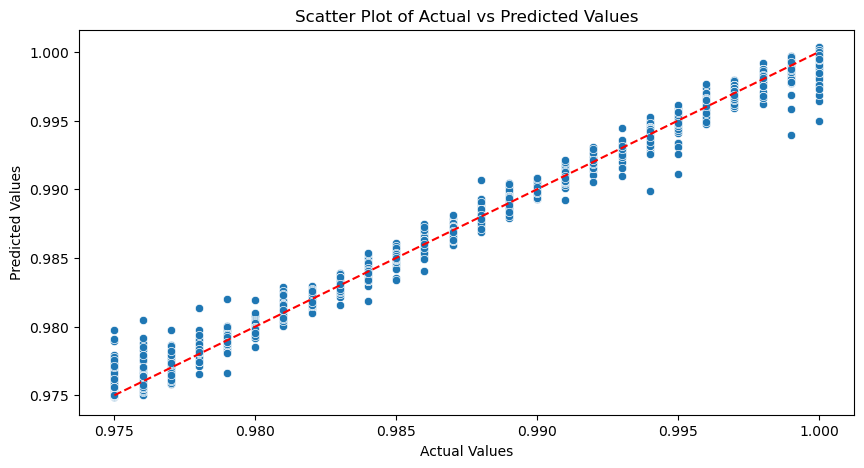

In [172]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y2_test, y=y2_test_pred_xgb)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

In [189]:
import pickle 
pickle.dump(xgb_y2, open('Predictive_maintenancey2.pkl', 'wb'))

In [425]:
from sklearn.ensemble import IsolationForest

In [426]:
df_imputed3.iloc[:,-1:]

y_2
0      1.000
1      0.997
2      0.988
3      0.991
4      0.975
...      ...
12276  0.996
12277  0.991
12278  0.986
12279  0.988
12280  0.980

[11942 rows x 1 columns]

In [432]:
testdf = df_imputed.iloc[:,-2:]

In [428]:
clf = IsolationForest(contamination='auto')
clf.fit(x)


IsolationForest()

In [430]:
pred = clf.predict(x)

In [433]:
testdf.shape

(12281, 2)

In [434]:
pred

array([-1, -1, -1, ..., -1,  1, -1])

In [435]:
pred.shape

(11945,)

In [436]:
index = np.where(pred<0)
index

(array([    0,     1,     2, ..., 11941, 11942, 11944], dtype=int64),)

In [437]:
index

(array([    0,     1,     2, ..., 11941, 11942, 11944], dtype=int64),)

In [439]:
x1 = x.values

In [440]:
x1.shape

(11945, 14)

In [441]:
x1

array([[5.1400000e+00, 1.5000000e+01, 2.1640162e+04, ..., 1.0260000e+00,
        2.4960000e+01, 4.9400000e-01],
       [9.3000000e+00, 2.7000000e+01, 7.2776229e+04, ..., 1.0510000e+00,
        8.7741000e+01, 1.7370000e+00],
       [8.2060000e+00, 2.4000000e+01, 5.0994673e+04, ..., 1.0410000e+00,
        6.0546000e+01, 1.1990000e+00],
       ...,
       [5.1400000e+00, 1.5000000e+01, 2.1625687e+04, ..., 1.0270000e+00,
        2.4802000e+01, 4.9100000e-01],
       [4.1610000e+00, 1.2000000e+01, 1.4718853e+04, ..., 1.0230000e+00,
        1.6827000e+01, 3.3300000e-01],
       [2.0880000e+00, 6.0000000e+00, 3.2175690e+03, ..., 1.0190000e+00,
        1.8305000e+01, 1.6500000e-01]])

In [442]:
x1[index,0]

array([[5.14 , 9.3  , 8.206, ..., 6.175, 5.14 , 2.088]])

In [443]:
x1[index,1]

array([[15., 27., 24., ..., 18., 15.,  6.]])

In [308]:
df_imputed2

lp     v        gtt       gtn       ggn       ts       tp       t48  \
0      5.140  15.0  21640.162  1924.358  8516.691  175.324  175.324   706.702   
1      9.300  27.0  72776.229  3560.412  9759.837  645.137  645.137  1060.156   
2      8.206  24.0  50994.673  3087.535  9313.854  438.110  438.110   927.728   
3      5.140  15.0  21626.805  1924.329  8472.097  175.221  175.221   695.477   
4      5.140  15.0  21636.430  1924.313  8494.777  175.306  175.306   731.494   
...      ...   ...        ...       ...       ...      ...      ...       ...   
12429  9.300  27.0  72774.292  3560.407  9753.571  644.796  644.796  1055.580   
12430  6.175  18.0  29796.511  2307.266  8840.516  246.316  246.316   780.537   
12431  5.140  15.0  21625.687  1924.321  8466.713  175.249  175.249   699.706   
12432  4.161  12.0  14718.853  1547.451  7728.002  113.727  113.727   631.711   
12433  2.088   6.0   3217.569  1350.216  6786.171   23.347   23.347   525.820   

          t1       t2    p48     p1      p2   pexh     tic     mf    y_1  \
0      288.0  640.873  2.072  0.998  10.916  1.026  24.960  0.494  0.951   
1      288.0  774.302  4.511  0.998  22.426  1.051  87.741  1.737  0.982   
2      288.0  734.474  3.577  0.998  18.412  1.041  60.546  1.199  0.966   
3      288.0  633.124  2.086  0.998  11.074  1.027  24.549  0.486  0.989   
4      288.0  645.642  2.078  0.998  11.197  1.026  26.373  0.522  0.950   
...      ...      ...    ...    ...     ...    ...     ...    ...    ...   
12429  288.0  772.682  4.519  0.998  22.485  1.051  87.460  1.731  0.987   
12430  288.0  671.845  2.497  0.998  13.144  1.030  34.498  0.683  0.954   
12431  288.0  633.775  2.088  0.998  11.132  1.027  24.802  0.491  0.990   
12432  288.0  603.073  1.663  0.998   8.927  1.023  16.827  0.333  0.990   
12433  288.0  561.995  1.209  0.998   6.558  1.019  18.305  0.165  0.967   

         y_2  anomaly  
0      1.000        1  
1      0.997        1  
2      0.988        1  
3      0.991        1  
4      0.975        1  
...      ...      ...  
12429  0.996        1  
12430  0.991        1  
12431  0.986        1  
12432  0.988        1  
12433  0.980        1  

[12434 rows x 19 columns]

In [444]:
index = np.where(pred<0)
plt.scatter(df_imputed3.iloc[:,0], df_imputed3.iloc[:,14])
plt.scatter(x1[index,0], x1[index,1], edgecolors='r')

IndexError: single positional indexer is out-of-bounds

In [265]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(df_)
anomalies = data[iso_forest.predict(data) == -1]

ValueError: x and y must be the same size

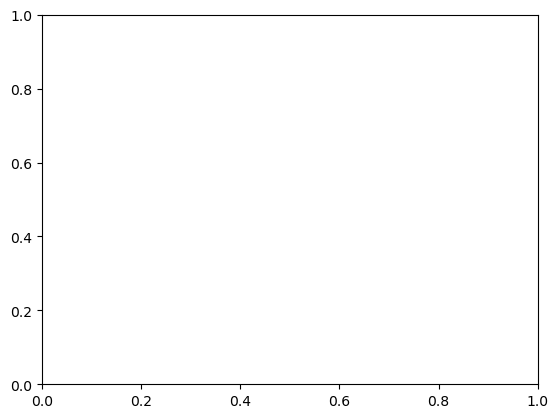

In [272]:
plt.scatter(anomalies,non_anomalies)

In [284]:
df_imputed2.describe()

lp             v           gtt           gtn           ggn  \
count  12434.000000  12434.000000  12434.000000  12434.000000  12434.000000   
mean       5.084408     14.757037  26566.732687   2111.273734   8167.901846   
std        2.620008      7.728601  22000.276417    769.301415   1089.572062   
min        1.138000      3.000000    253.547000   1307.675000   6589.002000   
25%        3.144000      9.000000   8375.507500   1386.756000   7050.891000   
50%        5.140000     15.000000  21628.714000   1924.318000   8476.448500   
75%        7.148000     21.000000  38997.847750   2678.077000   9130.284000   
max        9.300000     27.000000  72784.872000   3560.741000   9797.103000   

                 ts            tp           t48       t1            t2  \
count  12434.000000  12434.000000  12434.000000  12434.0  12434.000000   
mean     221.277493    221.277493    730.757490    288.0    644.173921   
std      199.009872    199.009872    172.649357      0.0     72.180827   
min        5.304000      5.304000    442.364000    288.0    540.442000   
25%       60.313000     60.313000    590.198750    288.0    578.212750   
50%      175.255000    175.255000    702.836500    288.0    635.688500   
75%      332.326000    332.326000    830.386750    288.0    692.418750   
max      645.249000    645.249000   1115.797000    288.0    789.094000   

                p48            p1            p2          pexh           tic  \
count  12434.000000  1.243400e+04  12434.000000  12434.000000  12434.000000   
mean       2.318907  9.980000e-01     12.131484      1.029140     32.891299   
std        1.077748  2.595806e-13      5.303211      0.010322     25.614683   
min        1.093000  9.980000e-01      5.828000      1.019000      0.000000   
25%        1.388000  9.980000e-01      7.437000      1.020000     12.915000   
50%        2.080000  9.980000e-01     11.057000      1.026000     25.110500   
75%        2.978000  9.980000e-01     15.616000      1.036000     44.312000   
max        4.560000  9.980000e-01     23.140000      1.052000     92.556000   

                 mf           y_1           y_2       anomaly  
count  12434.000000  12434.000000  12434.000000  12434.000000  
mean       0.647812      0.973995      0.986997      0.979894  
std        0.502762      0.015235      0.007747      0.199528  
min        0.068000      0.950000      0.975000     -1.000000  
25%        0.246000      0.961000      0.980000      1.000000  
50%        0.493000      0.974000      0.987000      1.000000  
75%        0.877000      0.987000      0.994000      1.000000  
max        1.832000      1.000000      1.000000      1.000000

In [285]:
df_imputed2.columns

Index(['lp', 'v', 'gtt', 'gtn', 'ggn', 'ts', 'tp', 't48', 't1', 't2', 'p48',
       'p1', 'p2', 'pexh', 'tic', 'mf', 'y_1', 'y_2', 'anomaly'],
      dtype='object')

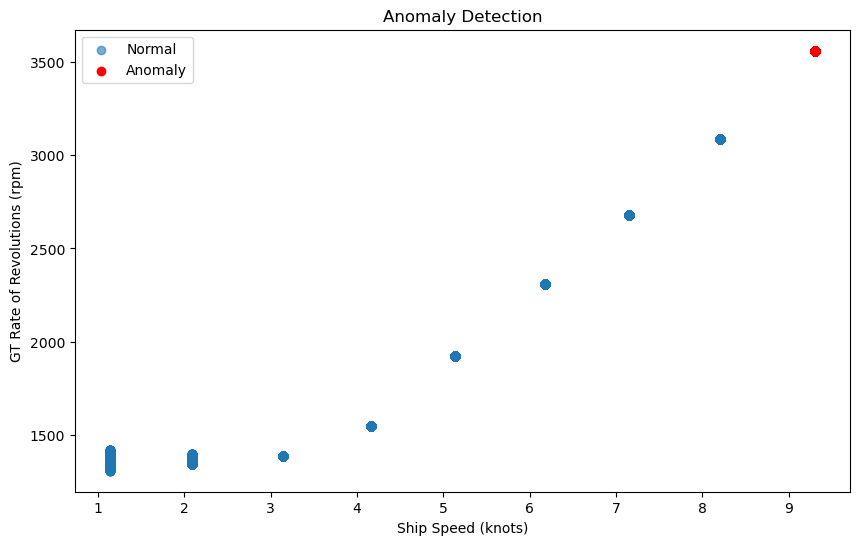

In [305]:
X = df_imputed2.drop(['y_1','y_2'], axis=1)

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X)
df_imputed2['anomaly'] = iso_forest.predict(X)

# Extract anomalies
anomalies = df_imputed2[df_imputed2['anomaly'] == -1]
non_anomalies = df_imputed2[df_imputed2['anomaly'] != -1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_anomalies['lp'], non_anomalies['gtn'], label='Normal', alpha=0.6)
plt.scatter(anomalies['lp'], anomalies['gtn'], color='r', label='Anomaly')
plt.xlabel('Ship Speed (knots)')
plt.ylabel('GT Rate of Revolutions (rpm)')
plt.title('Anomaly Detection')
plt.legend()
plt.show()

In [319]:
anomalies

lp     v        gtt       gtn       ggn       ts       tp       t48  \
48     9.3  27.0  72777.316  3560.397  9752.604  645.141  645.141  1047.927   
112    9.3  27.0  72780.874  3560.435  9792.359  645.119  645.119  1092.044   
180    9.3  27.0  72775.755  3560.398  9746.163  644.799  644.799  1041.561   
187    9.3  27.0  72758.560  3560.360  9725.702  644.988  644.988  1054.729   
221    9.3  27.0  72767.604  3560.389  9736.105  644.748  644.748  1047.074   
...    ...   ...        ...       ...       ...      ...      ...       ...   
12050  9.3  27.0  72762.643  3560.396  9776.138  644.899  644.899  1113.433   
12056  9.3  27.0  72782.758  3560.486  9793.792  645.143  645.143  1090.352   
12121  9.3  27.0  72773.742  3560.394  9744.671  645.086  645.086  1045.135   
12176  9.3  27.0  72761.809  3560.392  9771.369  644.710  644.710  1108.742   
12364  9.3  27.0  72776.617  3560.403  9751.525  644.999  644.999  1046.859   

          t1       t2    p48     p1      p2   pexh     tic     mf    y_1  \
48     288.0  770.705  4.519  0.998  22.406  1.051  86.747  1.717  0.991   
112    288.0  784.834  4.473  0.998  22.210  1.049  89.917  1.780  0.953   
180    288.0  768.625  4.527  0.998  22.445  1.052  86.292  1.708  0.997   
187    288.0  770.580  4.553  0.998  22.974  1.052  88.048  1.743  1.000   
221    288.0  769.303  4.540  0.998  22.697  1.052  87.069  1.724  0.999   
...      ...      ...    ...    ...     ...    ...     ...    ...    ...   
12050  288.0  788.352  4.500  0.998  22.824  1.049  92.397  1.829  0.952   
12056  288.0  784.580  4.471  0.998  22.158  1.049  89.715  1.776  0.953   
12121  288.0  769.412  4.529  0.998  22.517  1.052  86.675  1.716  0.996   
12176  288.0  786.879  4.505  0.998  22.851  1.049  92.081  1.823  0.956   
12364  288.0  770.356  4.521  0.998  22.412  1.051  86.670  1.716  0.992   

         y_2  anomaly  
48     1.000       -1  
112    0.998       -1  
180    1.000       -1  
187    0.981       -1  
221    0.991       -1  
...      ...      ...  
12050  0.975       -1  
12056  1.000       -1  
12121  0.997       -1  
12176  0.975       -1  
12364  1.000       -1  

[125 rows x 19 columns]

In [328]:
non_anomalies.iloc[:,17]

0        1.000
1        0.997
2        0.988
3        0.991
4        0.975
         ...  
12429    0.996
12430    0.991
12431    0.986
12432    0.988
12433    0.980
Name: y_2, Length: 12309, dtype: float64

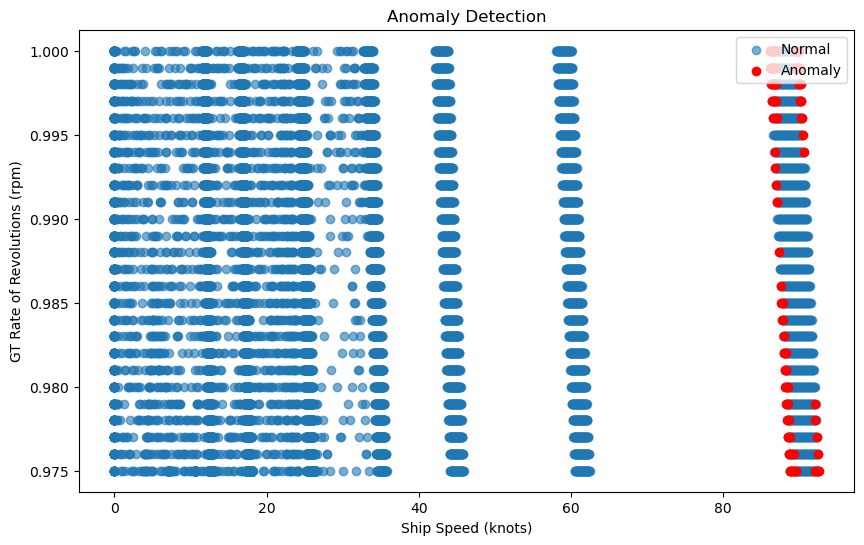

In [332]:
plt.figure(figsize=(10, 6))
plt.scatter(non_anomalies.iloc[:,14], non_anomalies.iloc[:,17], label='Normal', alpha=0.6)
plt.scatter(anomalies.iloc[:,14],anomalies.iloc[:,17], color='r', label='Anomaly')
plt.xlabel('Ship Speed (knots)')
plt.ylabel('GT Rate of Revolutions (rpm)')
plt.title('Anomaly Detection')
plt.legend()
plt.show()

In [292]:
df_imputed2

lp     v        gtt       gtn       ggn       ts       tp       t48  \
0      5.140  15.0  21640.162  1924.358  8516.691  175.324  175.324   706.702   
1      9.300  27.0  72776.229  3560.412  9759.837  645.137  645.137  1060.156   
2      8.206  24.0  50994.673  3087.535  9313.854  438.110  438.110   927.728   
3      5.140  15.0  21626.805  1924.329  8472.097  175.221  175.221   695.477   
4      5.140  15.0  21636.430  1924.313  8494.777  175.306  175.306   731.494   
...      ...   ...        ...       ...       ...      ...      ...       ...   
12429  9.300  27.0  72774.292  3560.407  9753.571  644.796  644.796  1055.580   
12430  6.175  18.0  29796.511  2307.266  8840.516  246.316  246.316   780.537   
12431  5.140  15.0  21625.687  1924.321  8466.713  175.249  175.249   699.706   
12432  4.161  12.0  14718.853  1547.451  7728.002  113.727  113.727   631.711   
12433  2.088   6.0   3217.569  1350.216  6786.171   23.347   23.347   525.820   

          t1       t2    p48     p1      p2   pexh     tic     mf    y_1  \
0      288.0  640.873  2.072  0.998  10.916  1.026  24.960  0.494  0.951   
1      288.0  774.302  4.511  0.998  22.426  1.051  87.741  1.737  0.982   
2      288.0  734.474  3.577  0.998  18.412  1.041  60.546  1.199  0.966   
3      288.0  633.124  2.086  0.998  11.074  1.027  24.549  0.486  0.989   
4      288.0  645.642  2.078  0.998  11.197  1.026  26.373  0.522  0.950   
...      ...      ...    ...    ...     ...    ...     ...    ...    ...   
12429  288.0  772.682  4.519  0.998  22.485  1.051  87.460  1.731  0.987   
12430  288.0  671.845  2.497  0.998  13.144  1.030  34.498  0.683  0.954   
12431  288.0  633.775  2.088  0.998  11.132  1.027  24.802  0.491  0.990   
12432  288.0  603.073  1.663  0.998   8.927  1.023  16.827  0.333  0.990   
12433  288.0  561.995  1.209  0.998   6.558  1.019  18.305  0.165  0.967   

         y_2  anomaly  
0      1.000        1  
1      0.997        1  
2      0.988        1  
3      0.991        1  
4      0.975        1  
...      ...      ...  
12429  0.996        1  
12430  0.991        1  
12431  0.986        1  
12432  0.988        1  
12433  0.980        1  

[12434 rows x 19 columns]

In [303]:
X

lp     v        gtt       gtn       ggn       ts       tp       t48  \
0      5.140  15.0  21640.162  1924.358  8516.691  175.324  175.324   706.702   
1      9.300  27.0  72776.229  3560.412  9759.837  645.137  645.137  1060.156   
2      8.206  24.0  50994.673  3087.535  9313.854  438.110  438.110   927.728   
3      5.140  15.0  21626.805  1924.329  8472.097  175.221  175.221   695.477   
4      5.140  15.0  21636.430  1924.313  8494.777  175.306  175.306   731.494   
...      ...   ...        ...       ...       ...      ...      ...       ...   
12429  9.300  27.0  72774.292  3560.407  9753.571  644.796  644.796  1055.580   
12430  6.175  18.0  29796.511  2307.266  8840.516  246.316  246.316   780.537   
12431  5.140  15.0  21625.687  1924.321  8466.713  175.249  175.249   699.706   
12432  4.161  12.0  14718.853  1547.451  7728.002  113.727  113.727   631.711   
12433  2.088   6.0   3217.569  1350.216  6786.171   23.347   23.347   525.820   

          t1       t2    p48     p1      p2   pexh     tic     mf  anomaly  
0      288.0  640.873  2.072  0.998  10.916  1.026  24.960  0.494        1  
1      288.0  774.302  4.511  0.998  22.426  1.051  87.741  1.737        1  
2      288.0  734.474  3.577  0.998  18.412  1.041  60.546  1.199        1  
3      288.0  633.124  2.086  0.998  11.074  1.027  24.549  0.486        1  
4      288.0  645.642  2.078  0.998  11.197  1.026  26.373  0.522        1  
...      ...      ...    ...    ...     ...    ...     ...    ...      ...  
12429  288.0  772.682  4.519  0.998  22.485  1.051  87.460  1.731        1  
12430  288.0  671.845  2.497  0.998  13.144  1.030  34.498  0.683        1  
12431  288.0  633.775  2.088  0.998  11.132  1.027  24.802  0.491        1  
12432  288.0  603.073  1.663  0.998   8.927  1.023  16.827  0.333        1  
12433  288.0  561.995  1.209  0.998   6.558  1.019  18.305  0.165        1  

[12434 rows x 17 columns]

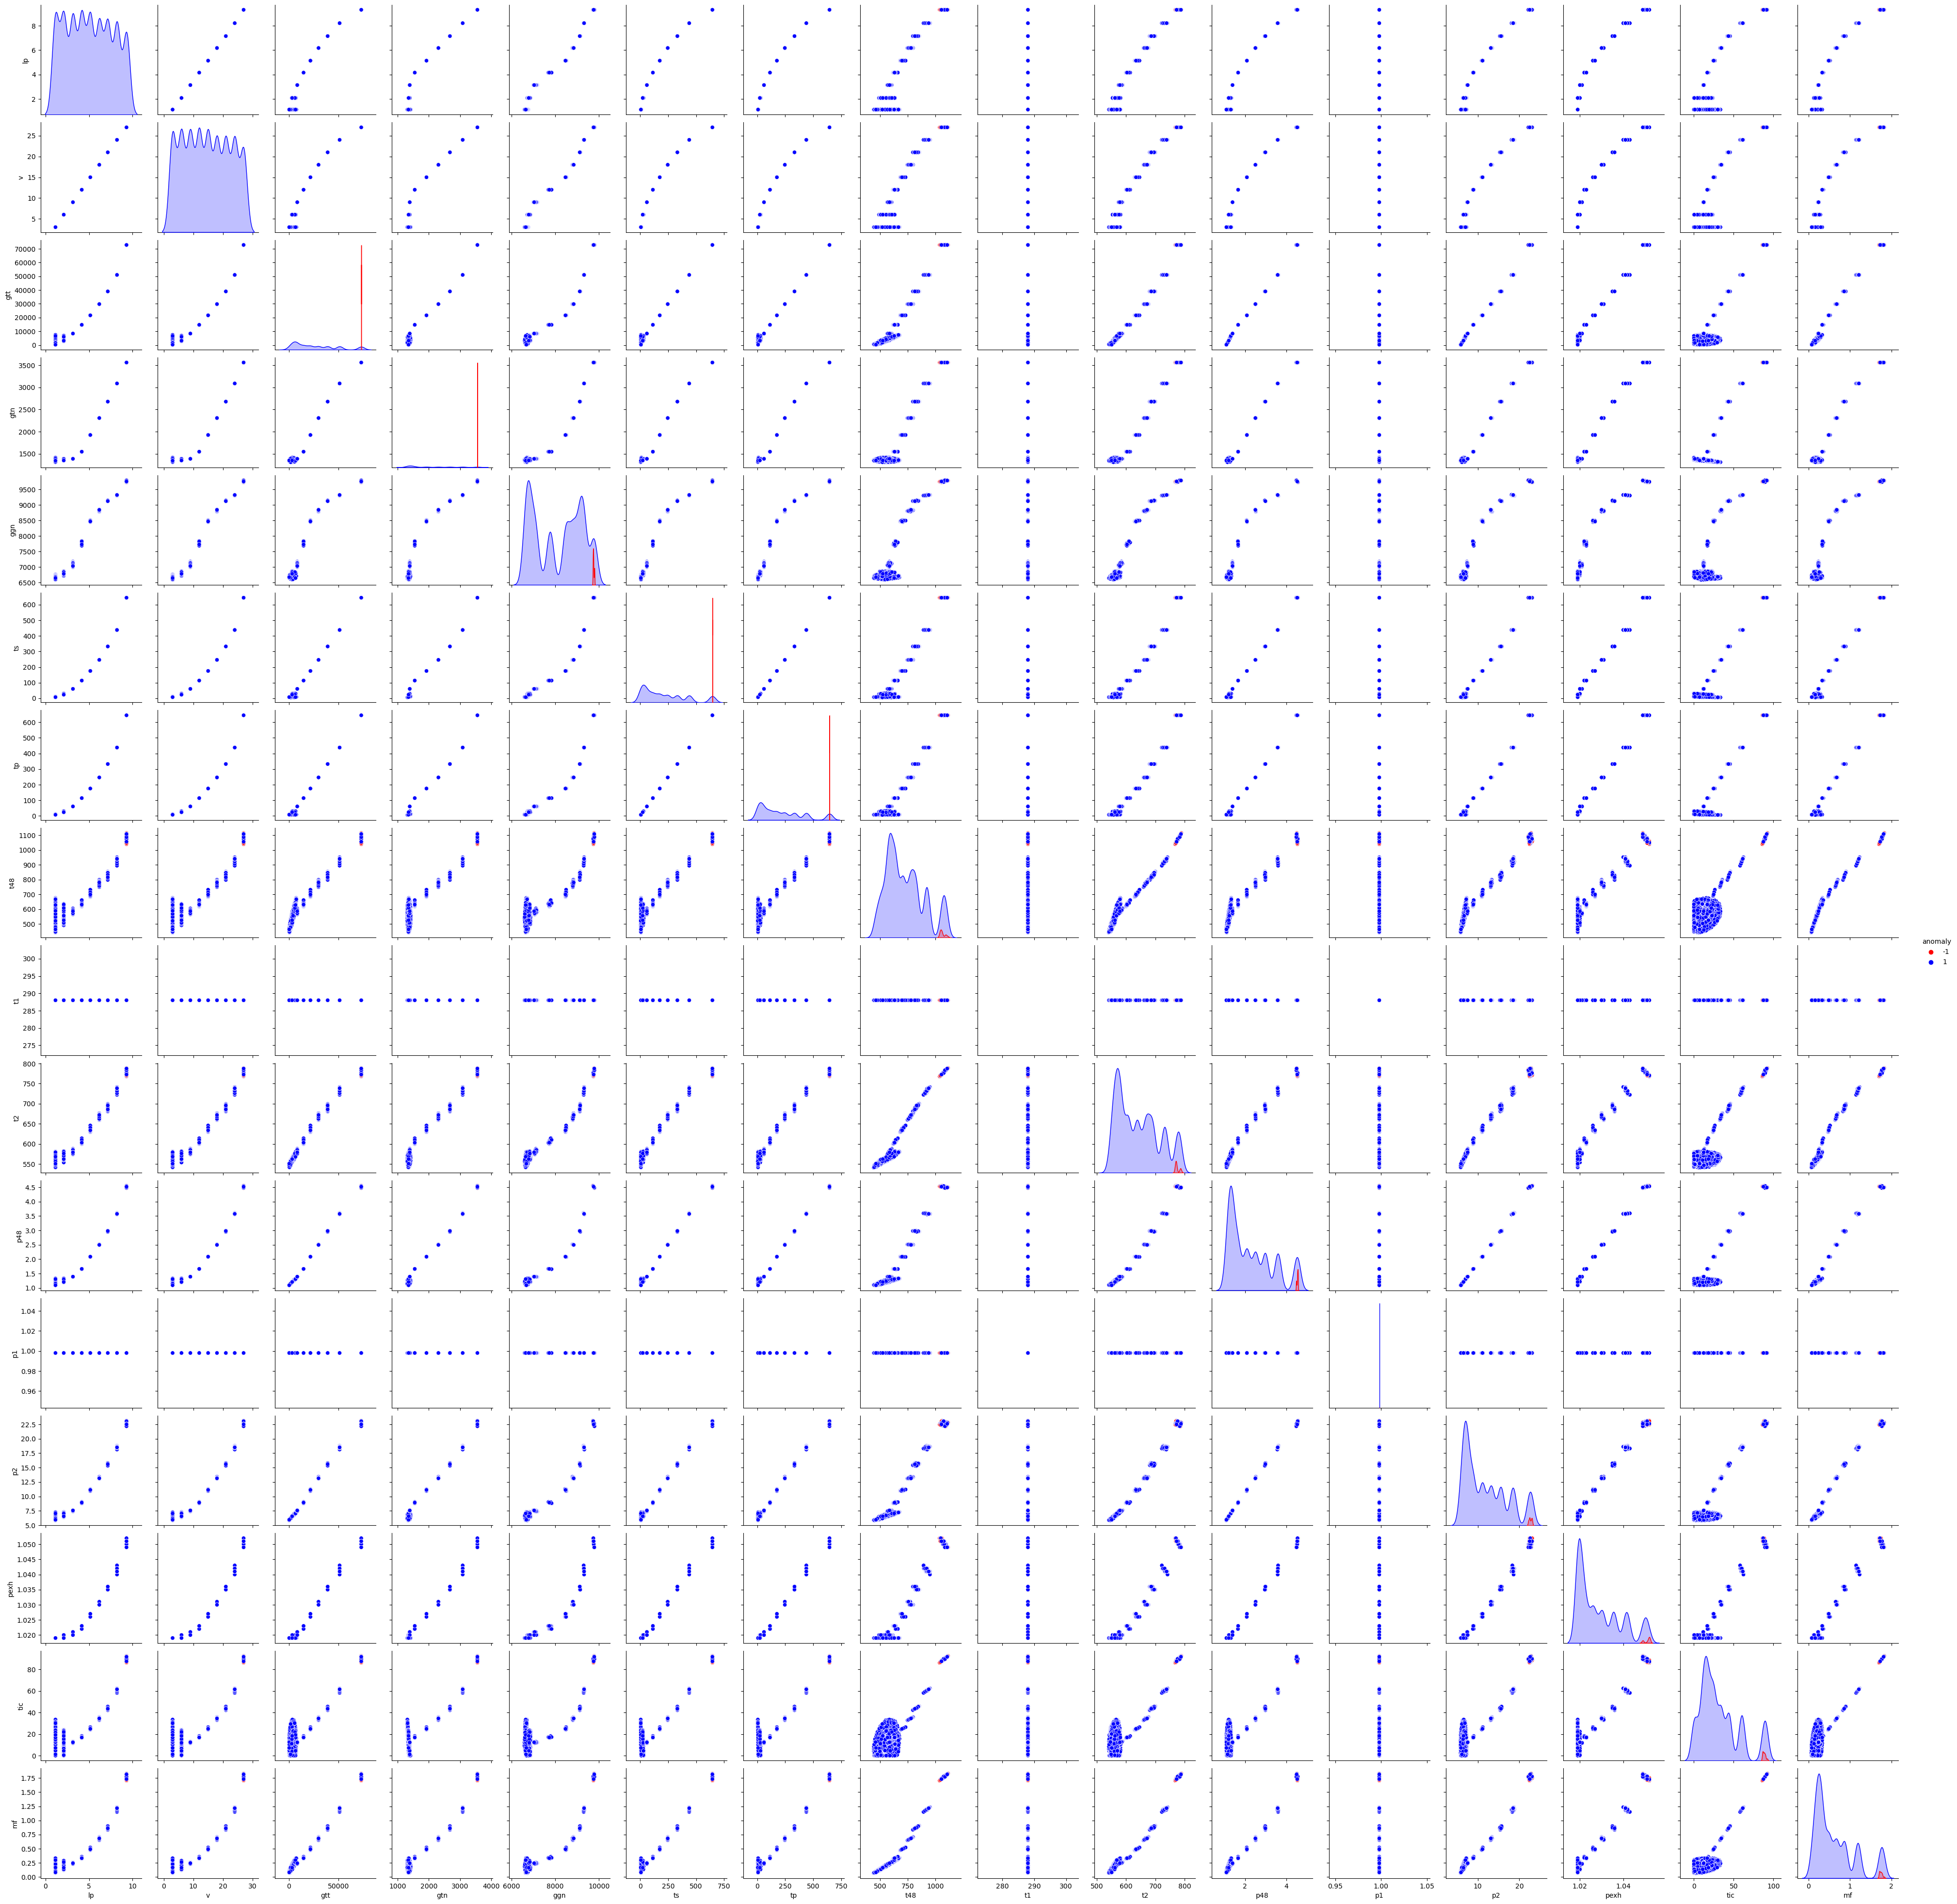

In [304]:
sns.pairplot(X, hue='anomaly', diag_kind='kde', palette={1: 'blue', -1: 'red'})
plt.show()

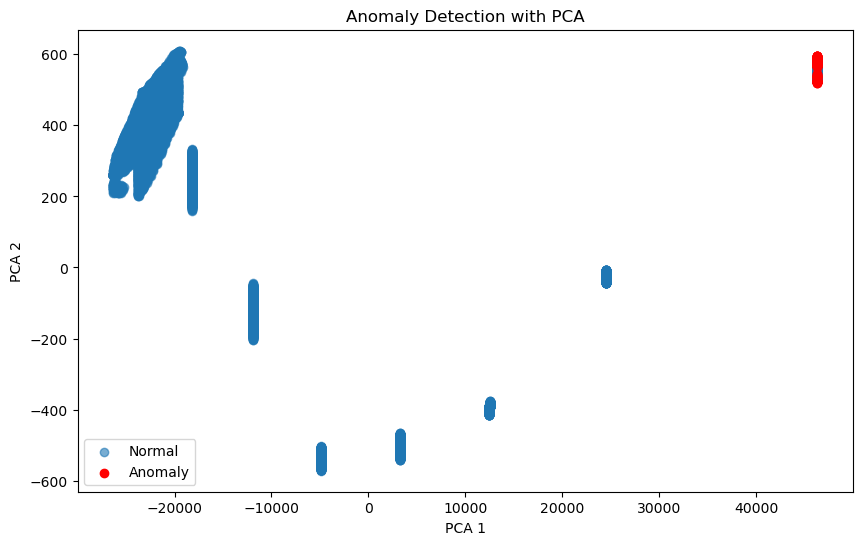

In [289]:
data = df_imputed2.copy()

# Data Preprocessing
#data.fillna(data.mean(), inplace=True)
X = data.drop(['y_1','y_2'], axis=1)

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X)
data['anomaly'] = iso_forest.predict(X)

# Extract anomalies
anomalies = data[data['anomaly'] == -1]
non_anomalies = data[data['anomaly'] != -1]

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[non_anomalies.index, 0], pca_result[non_anomalies.index, 1], label='Normal', alpha=0.6)
plt.scatter(pca_result[anomalies.index, 0], pca_result[anomalies.index, 1], color='r', label='Anomaly')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Anomaly Detection with PCA')
plt.legend()
plt.show()

In [108]:
import dtale

In [124]:
dtale.show(df)

In [110]:
df.describe()

lp             v           gtt           gtn           ggn  \
count  12386.000000  12372.000000  12386.000000  12380.000000  12389.000000   
mean       5.091730     14.784433  26629.808575   2114.004859   8170.637122   
std        2.620855      7.732232  22016.015791    769.776702   1090.006884   
min        1.138000      3.000000    253.547000   1307.675000   6589.002000   
25%        3.144000      9.000000   8375.517500   1386.756000   7051.201000   
50%        5.140000     15.000000  21628.965000   1924.319000   8477.011000   
75%        7.148000     21.000000  38998.160500   2678.077000   9130.490000   
max        9.300000     27.000000  72784.872000   3560.741000   9797.103000   

                 ts            tp           t48       t1            t2  \
count  12385.000000  12376.000000  12368.000000  12376.0  12386.000000   
mean     221.744977    221.994547    731.273808    288.0    644.354205   
std      199.224496    199.154902    172.865123      0.0     72.231525   
min        5.304000      5.304000    442.364000    288.0    540.442000   
25%       60.313000     60.314000    590.040500    288.0    578.199500   
50%      175.255000    175.256000    703.211500    288.0    635.803500   
75%      332.329000    332.330000    830.770500    288.0    692.565250   
max      645.249000    645.249000   1115.797000    288.0    789.094000   

                p48            p1            p2          pexh           tic  \
count  12384.000000  1.237400e+04  12391.000000  12377.000000  12370.000000   
mean       2.322415  9.980000e-01     12.145135      1.029175     32.983910   
std        1.078328  2.588034e-13      5.306440      0.010332     25.643388   
min        1.093000  9.980000e-01      5.828000      1.019000      0.000000   
25%        1.388000  9.980000e-01      7.437000      1.020000     12.954250   
50%        2.080000  9.980000e-01     11.061000      1.026000     25.130000   
75%        2.979000  9.980000e-01     15.619500      1.036000     44.342250   
max        4.560000  9.980000e-01     23.140000      1.052000     92.556000   

                 mf           y_1           y_2  
count  12399.000000  12393.000000  12381.000000  
mean       0.648773      0.974074      0.987049  
std        0.503076      0.015197      0.007724  
min        0.068000      0.950000      0.975000  
25%        0.246000      0.961000      0.980000  
50%        0.493000      0.974000      0.987000  
75%        0.878000      0.987000      0.994000  
max        1.832000      1.000000      1.000000